In [1]:
# Importing Pandas, NumPy, matplotlib and seaborn
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set max rows and columns to display in notebook

pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)

In [3]:
# Load data to df
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

# 1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

- Date columns have been converted to day in the month
- All missing values are handled

In [4]:
churn_data.shape

(99999, 226)

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Checking missing values in columns

null_val = churn_data.isnull().sum().reset_index()
null_val.columns=['column','no_of_missing_values']
null_val.set_index('column', inplace=True)
null_val['percentage'] = round((null_val['no_of_missing_values'])/(churn_data.shape[0])*100,2)
print(null_val[null_val['percentage']>10].shape)
null_val[null_val['percentage']>10].sort_values('column')

(40, 2)


no_of_missing_values  percentage
column                                                    
arpu_2g_6                                74846       74.85
arpu_2g_7                                74428       74.43
arpu_2g_8                                73660       73.66
arpu_2g_9                                74077       74.08
arpu_3g_6                                74846       74.85
arpu_3g_7                                74428       74.43
arpu_3g_8                                73660       73.66
arpu_3g_9                                74077       74.08
av_rech_amt_data_6                       74846       74.85
av_rech_amt_data_7                       74428       74.43
av_rech_amt_data_8                       73660       73.66
av_rech_amt_data_9                       74077       74.08
count_rech_2g_6                          74846       74.85
count_rech_2g_7                          74428       74.43
count_rech_2g_8                          73660       73.66
count_rech_2g_9                          74077       74.08
count_rech_3g_6                          74846       74.85
count_rech_3g_7                          74428       74.43
count_rech_3g_8                          73660       73.66
count_rech_3g_9                          74077       74.08
date_of_last_rech_data_6                 74846       74.85
date_of_last_rech_data_7                 74428       74.43
date_of_last_rech_data_8                 73660       73.66
date_of_last_rech_data_9                 74077       74.08
fb_user_6                                74846       74.85
fb_user_7                                74428       74.43
fb_user_8                                73660       73.66
fb_user_9                                74077       74.08
max_rech_data_6                          74846       74.85
max_rech_data_7                          74428       74.43
max_rech_data_8                          73660       73.66
max_rech_data_9                          74077       74.08
night_pck_user_6                         74846       74.85
night_pck_user_7                         74428       74.43
night_pck_user_8                         73660       73.66
night_pck_user_9                         74077       74.08
total_rech_data_6                        74846       74.85
total_rech_data_7                        74428       74.43
total_rech_data_8                        73660       73.66
total_rech_data_9                        74077       74.08

In [7]:
# Impute missing data_recharge columns with zero if all the realted fields are null for a record

churn_data['rech_data_null_all_6']=np.where(churn_data['date_of_last_rech_data_6'].isnull()&churn_data['total_rech_data_6'].isnull()&churn_data['max_rech_data_6'].isnull()&churn_data['av_rech_amt_data_6'].isnull()&churn_data['count_rech_2g_6'].isnull()&churn_data['count_rech_3g_6'].isnull()&churn_data['arpu_2g_6'].isnull()&churn_data['arpu_3g_6'].isnull(),0,1)

data_rech_col = ['total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6','count_rech_2g_6','count_rech_3g_6','arpu_2g_6','arpu_3g_6']
for col in data_rech_col:
    churn_data[col] = np.where(churn_data['rech_data_null_all_6']==0,0,churn_data[col])

In [8]:
# Impute missing data_recharge columns with zero if all the realted fields are null for a record

churn_data['rech_data_null_all_7']=np.where(churn_data['date_of_last_rech_data_7'].isnull()&churn_data['total_rech_data_7'].isnull()&churn_data['max_rech_data_7'].isnull()&churn_data['av_rech_amt_data_7'].isnull()&churn_data['count_rech_2g_7'].isnull()&churn_data['count_rech_3g_7'].isnull()&churn_data['arpu_2g_7'].isnull()&churn_data['arpu_3g_7'].isnull(),0,1)

data_rech_col = ['total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7','count_rech_2g_7','count_rech_3g_7','arpu_2g_7','arpu_3g_7']
for col in data_rech_col:
    churn_data[col] = np.where(churn_data['rech_data_null_all_7']==0,0,churn_data[col])

In [9]:
# Impute missing data_recharge columns with zero if all the realted fields are null for a record

churn_data['rech_data_null_all_8']=np.where(churn_data['date_of_last_rech_data_8'].isnull()&churn_data['total_rech_data_8'].isnull()&churn_data['max_rech_data_8'].isnull()&churn_data['av_rech_amt_data_8'].isnull()&churn_data['count_rech_2g_8'].isnull()&churn_data['count_rech_3g_8'].isnull()&churn_data['arpu_2g_8'].isnull()&churn_data['arpu_3g_8'].isnull(),0,1)

data_rech_col = ['total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8','count_rech_2g_8','count_rech_3g_8','arpu_2g_8','arpu_3g_8']
for col in data_rech_col:
    churn_data[col] = np.where(churn_data['rech_data_null_all_8']==0,0,churn_data[col])

In [10]:
# Impute missing data_recharge columns with zero if all the realted fields are null for a record

churn_data['rech_data_null_all_9']=np.where(churn_data['date_of_last_rech_data_9'].isnull()&churn_data['total_rech_data_9'].isnull()&churn_data['max_rech_data_9'].isnull()&churn_data['av_rech_amt_data_9'].isnull()&churn_data['count_rech_2g_9'].isnull()&churn_data['count_rech_3g_9'].isnull()&churn_data['arpu_2g_9'].isnull()&churn_data['arpu_3g_9'].isnull(),0,1)

data_rech_col = ['total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9','count_rech_2g_9','count_rech_3g_9','arpu_2g_9','arpu_3g_9']
for col in data_rech_col:
    churn_data[col] = np.where(churn_data['rech_data_null_all_9']==0,0,churn_data[col])

In [11]:
# drop temporory created columns

churn_data.drop(columns=['rech_data_null_all_6','rech_data_null_all_7','rech_data_null_all_8','rech_data_null_all_9'], inplace=True)

In [12]:
# Checking missing values agian

null_val = churn_data.isnull().sum().reset_index()
null_val.columns=['column','no_of_missing_values']
null_val.set_index('column', inplace=True)
null_val['percentage'] = round((null_val['no_of_missing_values'])/(churn_data.shape[0])*100,2)
print(null_val[null_val['percentage']>10].shape)
null_val[null_val['percentage']>10].sort_values('column')

(12, 2)


no_of_missing_values  percentage
column                                                    
date_of_last_rech_data_6                 74846       74.85
date_of_last_rech_data_7                 74428       74.43
date_of_last_rech_data_8                 73660       73.66
date_of_last_rech_data_9                 74077       74.08
fb_user_6                                74846       74.85
fb_user_7                                74428       74.43
fb_user_8                                73660       73.66
fb_user_9                                74077       74.08
night_pck_user_6                         74846       74.85
night_pck_user_7                         74428       74.43
night_pck_user_8                         73660       73.66
night_pck_user_9                         74077       74.08

In [13]:
# Impute fb_user, night_pck_user missing values with zero if they have no packs (total/monthly) purchased in first place.

churn_data['total_packs_6']=churn_data['monthly_2g_6']+churn_data['monthly_3g_6']+churn_data['sachet_2g_6']+churn_data['sachet_3g_6']
churn_data['total_packs_7']=churn_data['monthly_2g_7']+churn_data['monthly_3g_7']+churn_data['sachet_2g_7']+churn_data['sachet_3g_7']
churn_data['total_packs_8']=churn_data['monthly_2g_8']+churn_data['monthly_3g_8']+churn_data['sachet_2g_8']+churn_data['sachet_3g_8']
churn_data['total_packs_9']=churn_data['monthly_2g_9']+churn_data['monthly_3g_9']+churn_data['sachet_2g_9']+churn_data['sachet_3g_9']

churn_data['night_pck_user_6'] = np.where(churn_data['total_packs_6']==0,0,churn_data['night_pck_user_6'])
churn_data['night_pck_user_7'] = np.where(churn_data['total_packs_7']==0,0,churn_data['night_pck_user_7'])
churn_data['night_pck_user_8'] = np.where(churn_data['total_packs_8']==0,0,churn_data['night_pck_user_8'])
churn_data['night_pck_user_9'] = np.where(churn_data['total_packs_9']==0,0,churn_data['night_pck_user_9'])

churn_data['fb_user_6'] = np.where(churn_data['total_packs_6']==0,0,churn_data['fb_user_6'])
churn_data['fb_user_7'] = np.where(churn_data['total_packs_7']==0,0,churn_data['fb_user_7'])
churn_data['fb_user_8'] = np.where(churn_data['total_packs_8']==0,0,churn_data['fb_user_8'])
churn_data['fb_user_9'] = np.where(churn_data['total_packs_9']==0,0,churn_data['fb_user_9'])

churn_data.drop(columns=['total_packs_6','total_packs_7','total_packs_8','total_packs_9'], inplace=True)

In [14]:
# Checking missing values agian

null_val = churn_data.isnull().sum().reset_index()
null_val.columns=['column','no_of_missing_values']
null_val.set_index('column', inplace=True)
null_val['percentage'] = round((null_val['no_of_missing_values'])/(churn_data.shape[0])*100,2)
print(null_val[null_val['no_of_missing_values']>0].shape)
null_val[null_val['no_of_missing_values']>0].sort_values('no_of_missing_values', ascending=False)

(130, 2)


no_of_missing_values  percentage
column                                                    
date_of_last_rech_data_6                 74846       74.85
date_of_last_rech_data_7                 74428       74.43
date_of_last_rech_data_9                 74077       74.08
date_of_last_rech_data_8                 73660       73.66
loc_ic_t2m_mou_9                          7745        7.75
loc_og_t2c_mou_9                          7745        7.75
loc_og_mou_9                              7745        7.75
std_og_t2t_mou_9                          7745        7.75
std_og_t2m_mou_9                          7745        7.75
std_og_t2f_mou_9                          7745        7.75
std_og_t2c_mou_9                          7745        7.75
std_og_mou_9                              7745        7.75
spl_og_mou_9                              7745        7.75
og_others_9                               7745        7.75
loc_ic_t2t_mou_9                          7745        7.75
loc_ic_mou_9                              7745        7.75
loc_ic_t2f_mou_9                          7745        7.75
loc_og_t2m_mou_9                          7745        7.75
std_ic_t2t_mou_9                          7745        7.75
std_ic_t2m_mou_9                          7745        7.75
std_ic_t2f_mou_9                          7745        7.75
std_ic_t2o_mou_9                          7745        7.75
std_ic_mou_9                              7745        7.75
spl_ic_mou_9                              7745        7.75
isd_ic_mou_9                              7745        7.75
ic_others_9                               7745        7.75
loc_og_t2f_mou_9                          7745        7.75
isd_og_mou_9                              7745        7.75
roam_ic_mou_9                             7745        7.75
offnet_mou_9                              7745        7.75
roam_og_mou_9                             7745        7.75
loc_og_t2t_mou_9                          7745        7.75
onnet_mou_9                               7745        7.75
std_og_mou_8                              5378        5.38
std_og_t2f_mou_8                          5378        5.38
loc_ic_t2f_mou_8                          5378        5.38
std_ic_t2o_mou_8                          5378        5.38
std_og_t2c_mou_8                          5378        5.38
roam_og_mou_8                             5378        5.38
loc_og_t2m_mou_8                          5378        5.38
loc_ic_mou_8                              5378        5.38
loc_ic_t2m_mou_8                          5378        5.38
isd_og_mou_8                              5378        5.38
roam_ic_mou_8                             5378        5.38
onnet_mou_8                               5378        5.38
spl_og_mou_8                              5378        5.38
loc_ic_t2t_mou_8                          5378        5.38
std_ic_mou_8                              5378        5.38
spl_ic_mou_8                              5378        5.38
og_others_8                               5378        5.38
std_og_t2m_mou_8                          5378        5.38
isd_ic_mou_8                              5378        5.38
std_ic_t2f_mou_8                          5378        5.38
std_og_t2t_mou_8                          5378        5.38
std_ic_t2t_mou_8                          5378        5.38
loc_og_t2t_mou_8                          5378        5.38
loc_og_mou_8                              5378        5.38
offnet_mou_8                              5378        5.38
loc_og_t2f_mou_8                          5378        5.38
loc_og_t2c_mou_8                          5378        5.38
std_ic_t2m_mou_8                          5378        5.38
ic_others_8                               5378        5.38
date_of_last_rech_9                       4760        4.76
offnet_mou_6                              3937        3.94
loc_ic_t2t_mou_6                          3937        3.94
std_ic_t2m_mou_6                          3937        3.94
loc_ic_t2m_mou

In [15]:
# Convert dates to the day in that month, date (1-31) is numeric. Since our analysis is aroung 3 months, okay to have date.

date_columns= list(churn_data.dtypes[churn_data.dtypes=='object'].index)
for col in date_columns:
    churn_data[col] = pd.DatetimeIndex(pd.to_datetime(churn_data[col],format='%m/%d/%Y')).day
    mode_val = churn_data[col].mode()
    churn_data[col] = churn_data[col].fillna(mode_val[0])

In [16]:
# Checking missing values agian

null_val = churn_data.isnull().sum().reset_index()
null_val.columns=['column','no_of_missing_values']
null_val.set_index('column', inplace=True)
null_val['percentage'] = round((null_val['no_of_missing_values'])/(churn_data.shape[0])*100,2)
print(null_val[null_val['no_of_missing_values']>0].shape)
null_val[null_val['no_of_missing_values']>0].sort_values('no_of_missing_values', ascending=False).head()

(119, 2)


no_of_missing_values  percentage
column                                            
ic_others_9                       7745        7.75
std_og_t2m_mou_9                  7745        7.75
loc_og_t2m_mou_9                  7745        7.75
std_ic_t2f_mou_9                  7745        7.75
loc_og_t2f_mou_9                  7745        7.75

In [17]:
# Drop rows with null values in ic_others_9 column

churn_data = churn_data[~churn_data['ic_others_9'].isnull()]
churn_data.shape

(92254, 226)

In [18]:
# Checking missing values agian

null_val = churn_data.isnull().sum().reset_index()
null_val.columns=['column','no_of_missing_values']
null_val.set_index('column', inplace=True)
null_val['percentage'] = round((null_val['no_of_missing_values'])/(churn_data.shape[0])*100,2)
print(null_val[null_val['no_of_missing_values']>0].shape)
null_val[null_val['no_of_missing_values']>0].sort_values('no_of_missing_values', ascending=False).head()

(87, 2)


no_of_missing_values  percentage
column                                            
onnet_mou_6                       2403         2.6
std_og_t2m_mou_6                  2403         2.6
spl_og_mou_6                      2403         2.6
std_ic_t2m_mou_6                  2403         2.6
loc_og_mou_6                      2403         2.6

In [19]:
# Drop rows with null values in onnet_mou_6 column

churn_data = churn_data[~churn_data['onnet_mou_6'].isnull()]
churn_data.shape

(89851, 226)

In [20]:
# Checking missing values agian

null_val = churn_data.isnull().sum().reset_index()
null_val.columns=['column','no_of_missing_values']
null_val.set_index('column', inplace=True)
null_val['percentage'] = round((null_val['no_of_missing_values'])/(churn_data.shape[0])*100,2)
print(null_val[null_val['no_of_missing_values']>0].shape)
null_val[null_val['no_of_missing_values']>0].sort_values('no_of_missing_values', ascending=False).head()

(58, 2)


no_of_missing_values  percentage
column                                            
isd_og_mou_8                       856        0.95
loc_ic_t2f_mou_8                   856        0.95
std_og_t2c_mou_8                   856        0.95
std_og_mou_8                       856        0.95
onnet_mou_8                        856        0.95

In [21]:
# Drop rows with null values in isd_og_mou_8 column

churn_data = churn_data[~churn_data['isd_og_mou_8'].isnull()]
churn_data.shape

(88995, 226)

In [22]:
# Checking missing values agian

null_val = churn_data.isnull().sum().reset_index()
null_val.columns=['column','no_of_missing_values']
null_val.set_index('column', inplace=True)
null_val['percentage'] = round((null_val['no_of_missing_values'])/(churn_data.shape[0])*100,2)
print(null_val[null_val['no_of_missing_values']>0].shape)
null_val[null_val['no_of_missing_values']>0].sort_values('no_of_missing_values', ascending=False).head()

(29, 2)


no_of_missing_values  percentage
column                                        
onnet_mou_7                    668        0.75
spl_og_mou_7                   668        0.75
isd_ic_mou_7                   668        0.75
spl_ic_mou_7                   668        0.75
std_ic_mou_7                   668        0.75

In [23]:
# Drop rows with null values in onnet_mou_7 column

churn_data = churn_data[~churn_data['onnet_mou_7'].isnull()]
churn_data.shape

(88327, 226)

In [24]:
# No more missing values

churn_data.isnull().sum().sum()

0

### 3. Derive new features.

Below 3 new features have ben derived from data
- av_rech_amt_6 = average recharge amount in that month (Total amount/no.of recharges)
- og_ic_ratio_6 = ratio of total outgoing calls to incoming calls in that month
- data_other_total_rech_amt_ratio_6 = ratio of data recharge to non-data recharge amount in that month

In [25]:
# Filtering high-value customers (Those who have recharged with an amount more than or equal to 
# the 70th percentile of the average recharge amount in the first two months (the good phase).)

churn_data['avg_rech_amt_6_7'] = (churn_data['total_rech_num_6']+churn_data['total_rech_num_7'])/2
churn_data[['total_rech_num_6','total_rech_num_7','avg_rech_amt_6_7']].head()

total_rech_num_6  total_rech_num_7  avg_rech_amt_6_7
1                 4                 9               6.5
2                 5                 4               4.5
3                10                11              10.5
4                 5                 6               5.5
5                 2                 2               2.0

In [26]:
# Filtering high-value customers (Those who have recharged with an amount more than or equal to 
# the 70th percentile of the average recharge amount in the first two months (the good phase).)

percentil_70 = churn_data['avg_rech_amt_6_7'].quantile(.7)
churn_data_hvc = churn_data[churn_data['avg_rech_amt_6_7']>=percentil_70]
churn_data_hvc.drop(columns='avg_rech_amt_6_7', inplace=True)
churn_data_hvc.shape

(28274, 226)

In [27]:
# Identifyig Churn customers ( with no activity in 9th month)

churn_data_hvc['churn'] = np.where((churn_data_hvc['total_ic_mou_9']==0.0) & (churn_data_hvc['total_og_mou_9']==0.0) & 
                                   (churn_data_hvc['vol_2g_mb_9']==0.0) & (churn_data_hvc['vol_3g_mb_9']==0.0), 1, 0)
churn_data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
3           305.38          362.54          0.0          0.0      0
6          2572.49           65.91          0.0          0.0      0
8            34.91          142.18          0.0          0.0      0
17           87.13          631.08          0.0          0.0      0
21          252.61         1031.53          0.0          0.0      0

In [28]:
churn_data_hvc['churn'].value_counts(normalize=True)*100

0    96.647096
1     3.352904
Name: churn, dtype: float64

In [29]:
# remove all the attributes corresponding to the churn phase

churn_phase_col = list(churn_data_hvc.columns[churn_data_hvc.columns.str.contains('_9')])
churn_phase_col.append('sep_vbc_3g')
churn_data_final = churn_data_hvc.drop(columns=churn_phase_col)
churn_data_final.shape

(28274, 172)

In [30]:
# drop unique id columns

churn_data_final.drop(columns=['mobile_number','circle_id'], inplace=True)

In [31]:
churn_data_final.shape

(28274, 170)

In [32]:
# derived variable: av_rech_amt_6 = average recharge amount in that month (Total amount/no.of recharges)

churn_data_final['og_ic_ratio_6'] = np.where(churn_data_final['total_ic_mou_6']!=0, 
                                            (churn_data_final['total_og_mou_6']/churn_data_final['total_ic_mou_6']),0)

churn_data_final['og_ic_ratio_7'] = np.where(churn_data_final['total_ic_mou_7']!=0, 
                                            (churn_data_final['total_og_mou_7']/churn_data_final['total_ic_mou_7']),0)

churn_data_final['og_ic_ratio_8'] = np.where(churn_data_final['total_ic_mou_8']!=0, 
                                            (churn_data_final['total_og_mou_8']/churn_data_final['total_ic_mou_8']),0)

In [33]:
# derived variable: og_ic_ratio_6 = ratio of total outgoing calls to incoming calls in that month

churn_data_final['av_rech_amt_6'] = np.where(churn_data_final['total_rech_num_6']!=0, 
                                            (churn_data_final['total_rech_amt_6']/churn_data_final['total_rech_num_6']),0)

churn_data_final['av_rech_amt_7'] = np.where(churn_data_final['total_rech_num_7']!=0, 
                                            (churn_data_final['total_rech_amt_7']/churn_data_final['total_rech_num_7']),0)

churn_data_final['av_rech_amt_8'] = np.where(churn_data_final['total_rech_num_8']!=0, 
                                            (churn_data_final['total_rech_amt_8']/churn_data_final['total_rech_num_8']),0)

In [34]:
# derived variable:  data_other_total_rech_amt_ratio_6 = ratio of data recharge to non-data recharge amount in that month

churn_data_final['data_other_total_rech_amt_ratio_6'] = np.where(churn_data_final['total_rech_amt_6']!=0,
                                                              (churn_data_final['av_rech_amt_data_6']*churn_data_final['total_rech_data_6']/churn_data_final['total_rech_amt_6']),0)

churn_data_final['data_other_total_rech_amt_ratio_7'] = np.where(churn_data_final['total_rech_amt_7']!=0,
                                                              (churn_data_final['av_rech_amt_data_7']*churn_data_final['total_rech_data_7']/churn_data_final['total_rech_amt_7']),0)

churn_data_final['data_other_total_rech_amt_ratio_8'] = np.where(churn_data_final['total_rech_amt_8']!=0,
                                                              (churn_data_final['av_rech_amt_data_8']*churn_data_final['total_rech_data_8']/churn_data_final['total_rech_amt_8']),0)

In [35]:
print(churn_data_final.shape)
churn_data_final.head()

(28274, 179)


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
3              0.0             0.0             0.0                    30   
6              0.0             0.0             0.0                    30   
8              0.0             0.0             0.0                    30   
17             0.0             0.0             0.0                    30   
21             0.0             0.0             0.0                    30   

    last_date_of_month_7  last_date_of_month_8   arpu_6   arpu_7   arpu_8  \
3                   31.0                  31.0  221.338  251.102  508.054   
6                   31.0                  31.0  429.023  190.704  255.114   
8                   31.0                  31.0  378.721  492.223  137.362   
17                  31.0                  31.0  690.008   18.980   25.499   
21                  31.0                  31.0  514.453  597.753  637.760   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
3         99.91        54.39       310.98        123.31        109.01   
6         71.03        45.03        76.66        262.73         49.24   
8        413.69       351.03        35.08         94.66         80.63   
17      1185.91         9.28         7.79         61.64          0.00   
21       102.41       132.11        85.14        757.93        896.68   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
3          71.68            0.0          54.86          44.38            0.0   
6          92.08            0.0           0.00           0.00            0.0   
8         136.48            0.0           0.00           0.00            0.0   
17          5.54            0.0           4.76           4.81            0.0   
21        983.39            0.0           0.00           0.00            0.0   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
3           28.09          39.04             73.68             34.81   
6            0.00           0.00             71.03             45.03   
8            0.00           0.00            297.13            217.59   
17           8.46          13.34             38.99              0.00   
21           0.00           0.00              4.48              6.16   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
3              10.61            107.43             83.21             22.46   
6              76.14            252.23             48.71             80.63   
8              12.49             80.96             70.58             50.54   
17              0.00             58.54              0.00              0.00   
21             23.34             91.81             87.93            104.81   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
3               1.91              0.65              4.91              0.00   
6              10.38              0.00              0.00              0.11   
8               0.00              0.00              0.00              0.00   
17              0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
3                0.0              0.00        183.03        118.68   
6                0.0              0.00        333.64         93.74   
8                0.0              7.15        378.09        288.18   
17               0.0              0.00         97.54          0.00   
21               0.0              0.00         97.04         94.09   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
3          37.99             26.23             14.89            289.58   
6         156.78              0.00              0.00              0.51   
8          63.04            116.56            133.43             22.58   
17          0.00           1146.91              0.81              0.00   
21

In [36]:
churn_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28274 entries, 3 to 99988
Columns: 179 entries, loc_og_t2o_mou to data_other_total_rech_amt_ratio_8
dtypes: float64(152), int32(1), int64(26)
memory usage: 38.7 MB


In [37]:
# define a custom function to append columns and months

def append_lists(list_1, list_2):
    list_out = []
    for col_1 in list_1:
        for col_2 in list_2:
            list_out.append(col_1+col_2)
    return list_out
append_lists(['total_og_mou_','total_ic_mou_'],['6','7','8'])

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [38]:
# Copy final data frame for Random forest model

churn_data_final_2 = churn_data_final.copy()

## 2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

#### EDA has been performed and below are my observations
`For Churm customers`
- Average revenue, recharge and out-going/incoming call volume distribution shifts towards lower/near-zero values as we move from good phase (6, 7 months) to action phase(8 month)
- Within total incoming call volumes, Roaming incoming calls tend to increase in action phase compared to good phase
- Within total outgoing call volumes, Roaming outgoing calls tend to increase in action phase compared to good phase
- Within total local/std outgoing call volumes, calls to cusomer service (og_t2c) calls slightly increases in action phase compared to good phase

In [39]:
# save churn, non-churn data into sepearte dfs

churn_data_final_0 = churn_data_final[churn_data_final['churn']==0]
churn_data_final_1 = churn_data_final[churn_data_final['churn']==1]
churn_data_final_0.shape, churn_data_final_1.shape

((27326, 179), (948, 179))


### Univariate Analysis
#### Neumerical (Continuous) variables

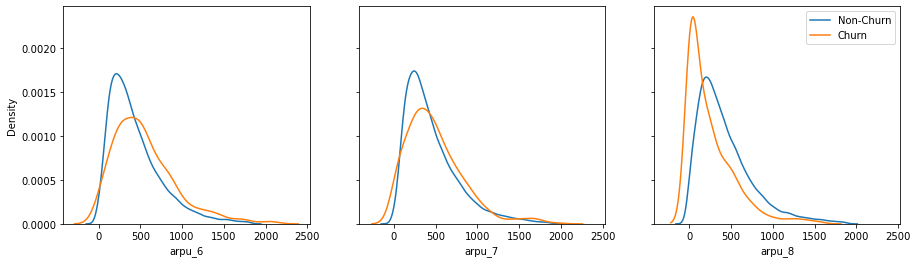

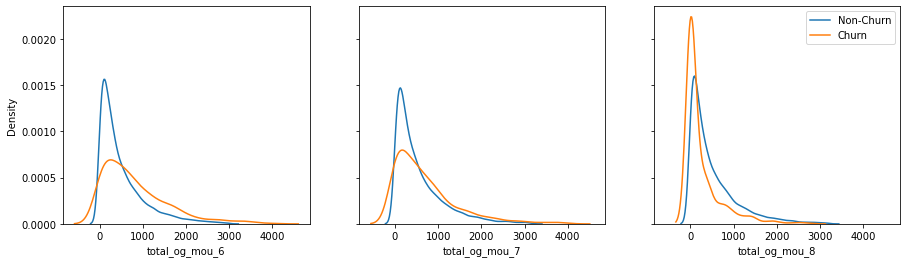

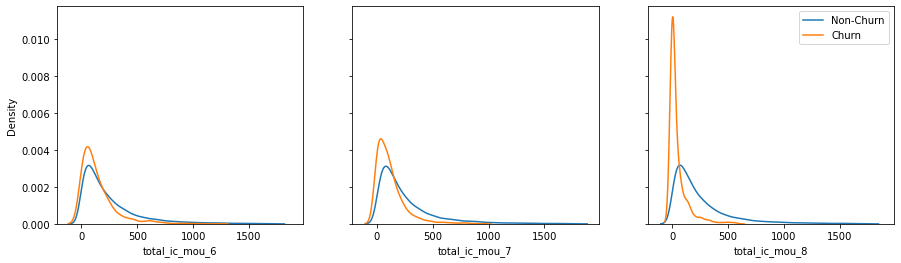

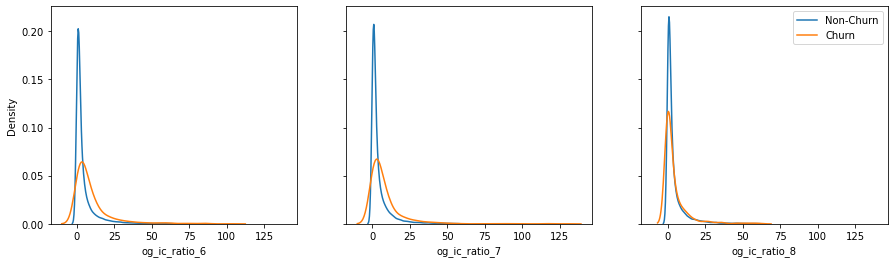

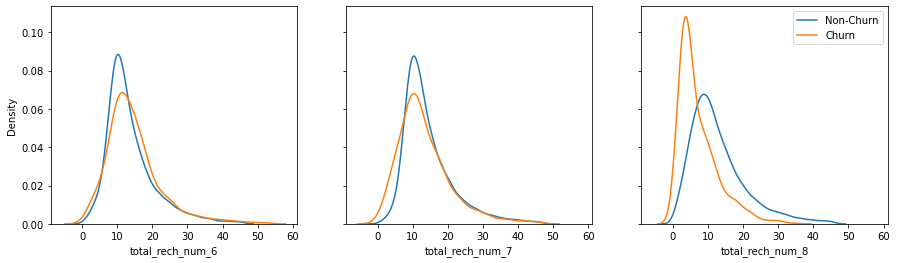

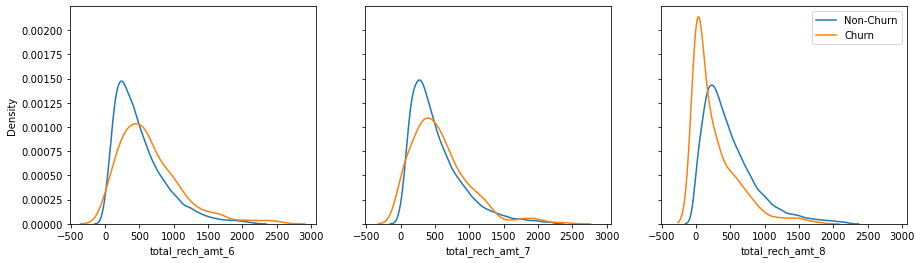

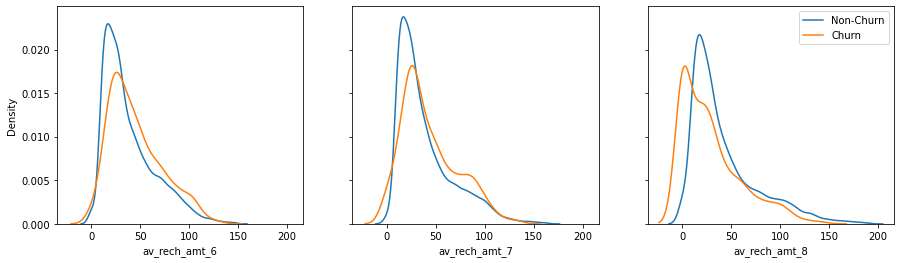

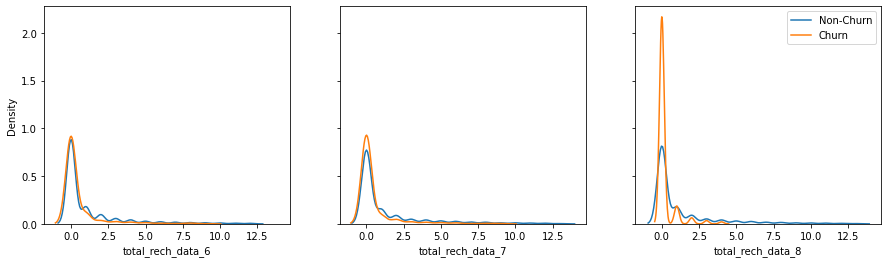

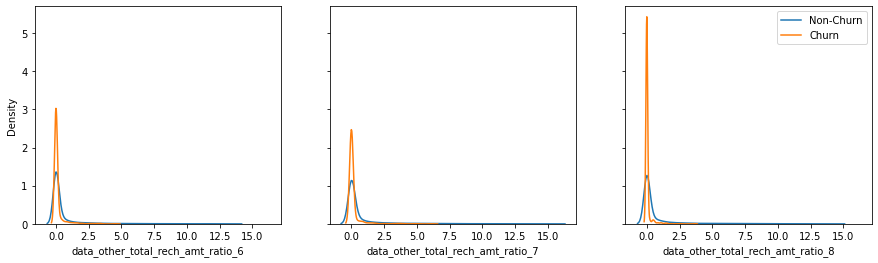

In [40]:
# Plotting user revenue, recharge amount and out-going/incoming call volume distrubutions for churn and non-churn customers for each month

# For Churn customers, Average user revenue, recharge amount and out-going/incoming call volume distribution shifts towards 
# lower/near-zero values as we move from good phase (6, 7 months) to action phase(8 month)

total_cols=['arpu_','total_og_mou_','total_ic_mou_','og_ic_ratio_', 'total_rech_num_','total_rech_amt_','av_rech_amt_',
            'total_rech_data_', 'data_other_total_rech_amt_ratio_']

for col in total_cols:
    
    columns = append_lists([col],['6','7','8'])
    
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

    ax1 = sns.distplot(churn_data_final_0[churn_data_final_0[columns[0]]< churn_data_final_0[columns[0]].quantile(.99)][columns[0]],hist=False,label='Non-Churn',ax=ax1)
    ax1 = sns.distplot(churn_data_final_1[churn_data_final_1[columns[0]]< churn_data_final_1[columns[0]].quantile(.99)][columns[0]],hist=False,label='Churn',ax=ax1)

    ax2 = sns.distplot(churn_data_final_0[churn_data_final_0[columns[1]]< churn_data_final_0[columns[1]].quantile(.99)][columns[1]],hist=False,label='Non-Churn',ax=ax2)
    ax2 = sns.distplot(churn_data_final_1[churn_data_final_1[columns[1]]< churn_data_final_1[columns[1]].quantile(.99)][columns[1]],hist=False,label='Churn',ax=ax2)

    ax3 = sns.distplot(churn_data_final_0[churn_data_final_0[columns[2]]< churn_data_final_0[columns[2]].quantile(.99)][columns[2]],hist=False,label='Non-Churn',ax=ax3)
    ax3 = sns.distplot(churn_data_final_1[churn_data_final_1[columns[2]]< churn_data_final_1[columns[2]].quantile(.99)][columns[2]],hist=False,label='Churn',ax=ax3)
   
    fig.set_size_inches(15,4)
    plt.legend()
    plt.show()

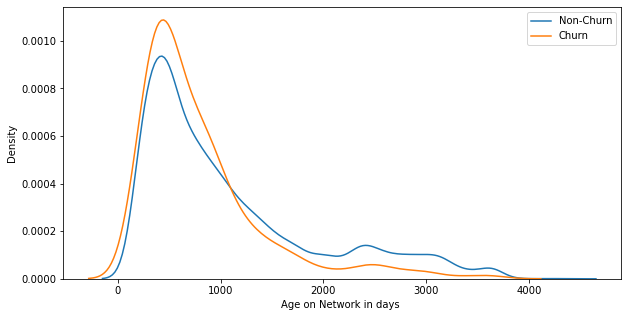

In [41]:
# Plotting user network age distrubution for churn and non-churn customers

sns.distplot(churn_data_final_0['aon'], hist=False,label='Non-Churn')
sns.distplot(churn_data_final_1['aon'], hist=False,label='Churn')
plt.xlabel('Age on Network in days ')

plt.gcf().set_size_inches(10,5)
plt.legend()
plt.show()

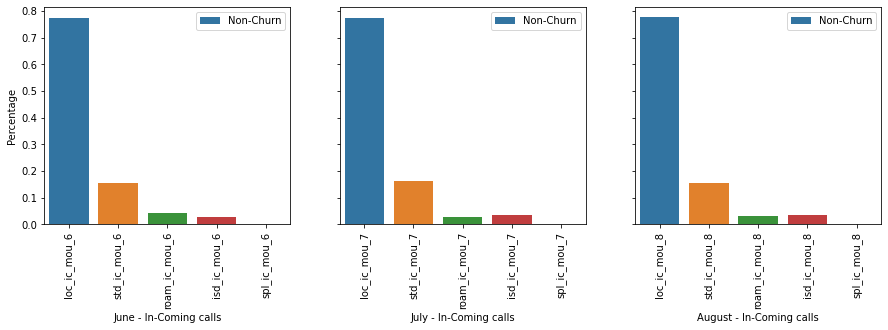

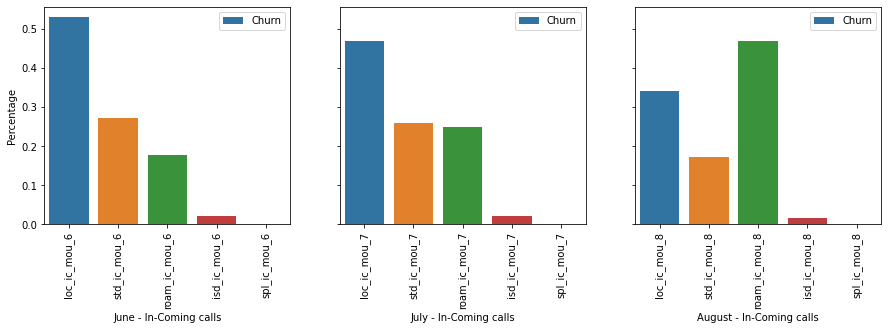

In [42]:
# Plotting the percentage of local, std, roaming and other spl calls among total incoming calls in each month

# For churn customers, within total incoming calls, Roaming calls tend to increase in action phase compared to good phase

df_list = {'Non-Churn': churn_data_final_0,'Churn':churn_data_final_1}

for df_cat,df in df_list.items():
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, sharex=False)
    
    columns_6 = ['loc_ic_mou_6', 'std_ic_mou_6', 'roam_ic_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6']
    ax1 = sns.barplot(y=(df[columns_6].sum()/df[columns_6].sum().sum()).values,
                      x=(df[columns_6].sum()/df[columns_6].sum().sum()).index,label=df_cat,ax=ax1)
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_xlabel('June - In-Coming calls')
    ax1.set_ylabel('Percentage')
    ax1.legend(loc='upper right')

    columns_7 = ['loc_ic_mou_7', 'std_ic_mou_7', 'roam_ic_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7']
    ax2 = sns.barplot(y=(df[columns_7].sum()/df[columns_7].sum().sum()).values,
                      x=(df[columns_7].sum()/df[columns_7].sum().sum()).index,label=df_cat,ax=ax2)
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_xlabel('July - In-Coming calls')
    ax2.legend(loc='upper right')

    columns_8 = ['loc_ic_mou_8', 'std_ic_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'spl_ic_mou_8']
    ax3 = sns.barplot(y=(df[columns_8].sum()/df[columns_8].sum().sum()).values,
                      x=(df[columns_8].sum()/df[columns_8].sum().sum()).index,label=df_cat,ax=ax3)
    ax3.tick_params(axis='x', rotation=90)
    ax3.set_xlabel('August - In-Coming calls')
    ax3.legend(loc='upper right')

    fig.set_size_inches(15,4)
    plt.legend()
    plt.show()

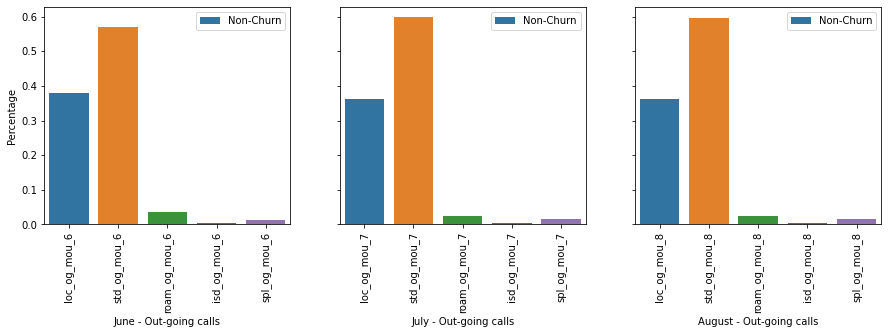

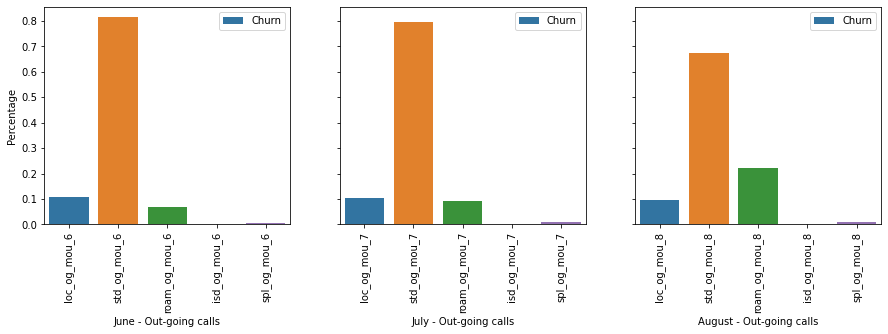

In [43]:
# Plotting the percentage of local, std, roaming and other spl calls among total outgoinh calls in each month

# For churn customers, within total outgoing calls, Roaming calls tend to increase in action phase compared to good phase

df_list = {'Non-Churn': churn_data_final_0,'Churn':churn_data_final_1}

for df_cat,df in df_list.items():
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, sharex=False)
    
    columns_6 = ['loc_og_mou_6','std_og_mou_6','roam_og_mou_6','isd_og_mou_6','spl_og_mou_6']
    ax1 = sns.barplot(y=(df[columns_6].sum()/df[columns_6].sum().sum()).values,
                      x=(df[columns_6].sum()/df[columns_6].sum().sum()).index,label=df_cat,ax=ax1)
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_xlabel('June - Out-going calls')
    ax1.set_ylabel('Percentage')
    ax1.legend(loc='upper right')

    columns_7 = ['loc_og_mou_7','std_og_mou_7','roam_og_mou_7','isd_og_mou_7','spl_og_mou_7']
    ax2 = sns.barplot(y=(df[columns_7].sum()/df[columns_7].sum().sum()).values,
                      x=(df[columns_7].sum()/df[columns_7].sum().sum()).index,label=df_cat,ax=ax2)
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_xlabel('July - Out-going calls')
    ax2.legend(loc='upper right')

    columns_8 = ['loc_og_mou_8','std_og_mou_8','roam_og_mou_8','isd_og_mou_8','spl_og_mou_8']
    ax3 = sns.barplot(y=(df[columns_8].sum()/df[columns_8].sum().sum()).values,
                      x=(df[columns_8].sum()/df[columns_8].sum().sum()).index,label=df_cat,ax=ax3)
    ax3.tick_params(axis='x', rotation=90)
    ax3.set_xlabel('August - Out-going calls')
    ax3.legend(loc='upper right')

    fig.set_size_inches(15,4)
    plt.legend()
    plt.show()

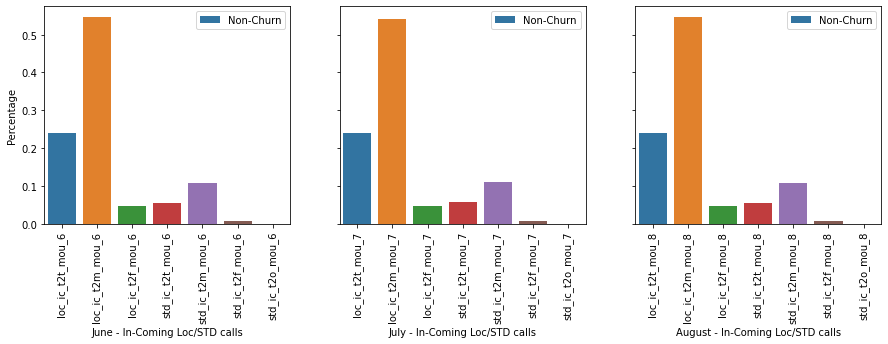

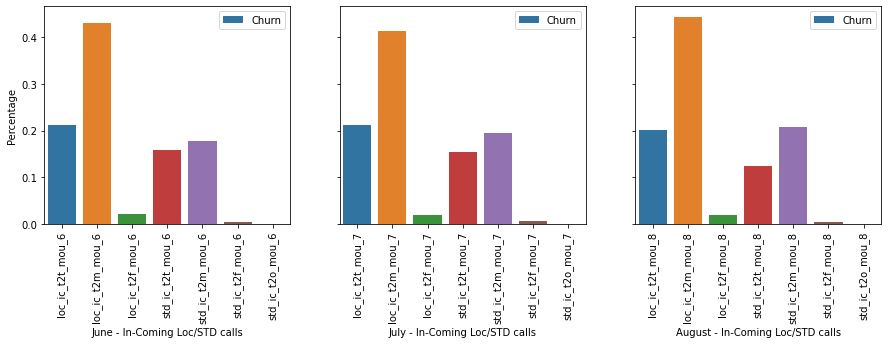

In [44]:
# Plotting percentage of different std/local incoming calls in a month

df_list = {'Non-Churn': churn_data_final_0,'Churn':churn_data_final_1}

for df_cat,df in df_list.items():
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, sharex=False)
    
    columns_6 = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6',
                 'std_ic_t2f_mou_6','std_ic_t2o_mou_6']
    ax1 = sns.barplot(y=(df[columns_6].sum()/df[columns_6].sum().sum()).values,
                      x=(df[columns_6].sum()/df[columns_6].sum().sum()).index,label=df_cat,ax=ax1)
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_xlabel('June - In-Coming Loc/STD calls')
    ax1.set_ylabel('Percentage')
    ax1.legend(loc='upper right')

    columns_7 = ['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7',
                 'std_ic_t2f_mou_7','std_ic_t2o_mou_7']
    ax2 = sns.barplot(y=(df[columns_7].sum()/df[columns_7].sum().sum()).values,
                      x=(df[columns_7].sum()/df[columns_7].sum().sum()).index,label=df_cat,ax=ax2)
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_xlabel('July - In-Coming Loc/STD calls')
    ax2.legend(loc='upper right')

    columns_8 = ['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8',
                 'std_ic_t2f_mou_8','std_ic_t2o_mou_8']
    ax3 = sns.barplot(y=(df[columns_8].sum()/df[columns_8].sum().sum()).values,
                      x=(df[columns_8].sum()/df[columns_8].sum().sum()).index,label=df_cat,ax=ax3)
    ax3.tick_params(axis='x', rotation=90)
    ax3.set_xlabel('August - In-Coming Loc/STD calls')
    ax3.legend(loc='upper right')

    fig.set_size_inches(15,4)
    plt.legend()
    plt.show()

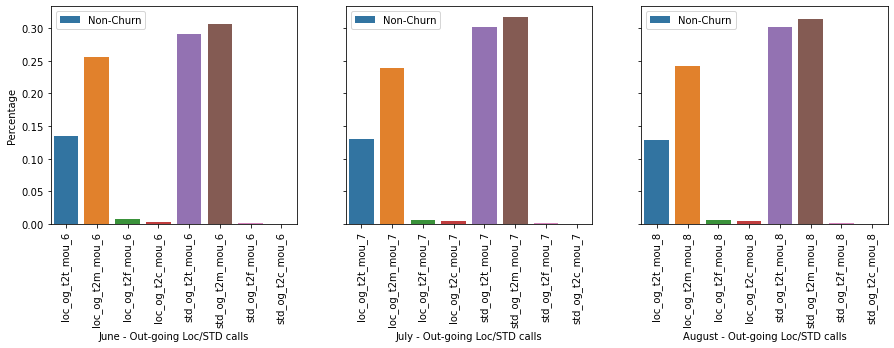

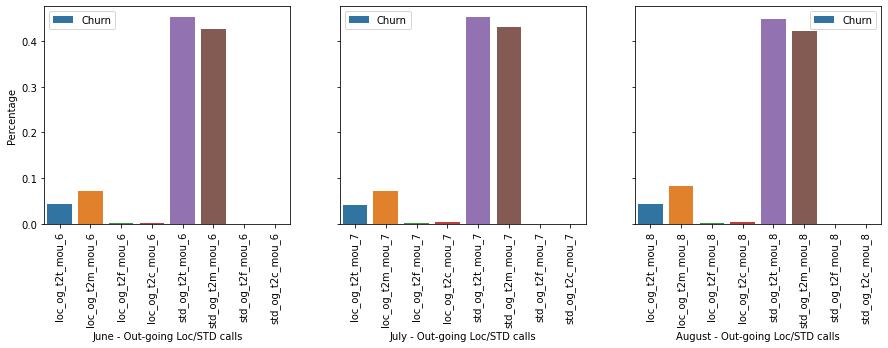

In [45]:
# Plotting percentage of different std/local outgoing calls in each month

# FOr churn customers, Within total local/std outgoing calls, calls to cusomer service (og_t2c) slightly increases 
# in action phase compared to good phase

df_list = {'Non-Churn': churn_data_final_0,'Churn':churn_data_final_1}

for df_cat,df in df_list.items():
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, sharex=False)
    
    columns_6 = ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 
                 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6']
    ax1 = sns.barplot(y=(df[columns_6].sum()/df[columns_6].sum().sum()).values,
                      x=(df[columns_6].sum()/df[columns_6].sum().sum()).index,label=df_cat,ax=ax1)
    ax1.tick_params(axis='x', rotation=90)
    ax1.set_xlabel('June - Out-going Loc/STD calls')
    ax1.set_ylabel('Percentage')
    ax1.legend(loc='upper left')

    columns_7 = ['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 
                 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7']
    ax2 = sns.barplot(y=(df[columns_7].sum()/df[columns_7].sum().sum()).values,
                      x=(df[columns_7].sum()/df[columns_7].sum().sum()).index,label=df_cat,ax=ax2)
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_xlabel('July - Out-going Loc/STD calls')
    ax2.legend(loc='upper left')

    columns_8 = ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 
                 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8']
    ax3 = sns.barplot(y=(df[columns_8].sum()/df[columns_8].sum().sum()).values,
                      x=(df[columns_8].sum()/df[columns_8].sum().sum()).index,label=df_cat,ax=ax3)
    ax3.tick_params(axis='x', rotation=90)
    ax3.set_xlabel('August - Out-going Loc/STD calls')
    ax3.legend(loc='upper left')

    fig.set_size_inches(15,4)
    plt.legend()
    plt.show()

## Outlier treatment

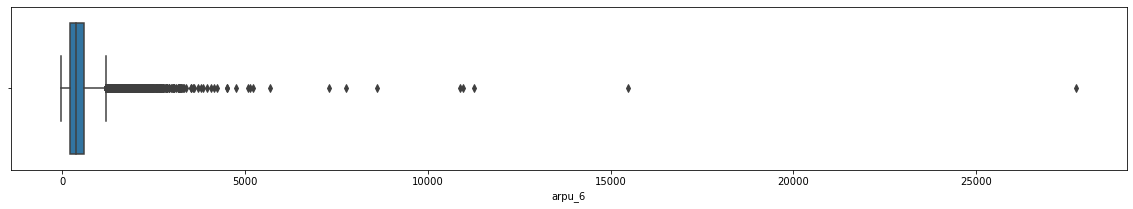

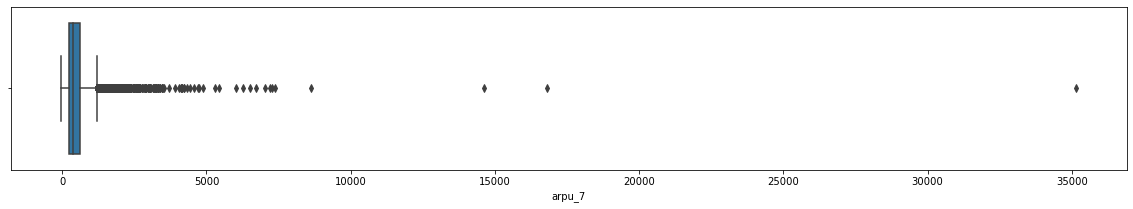

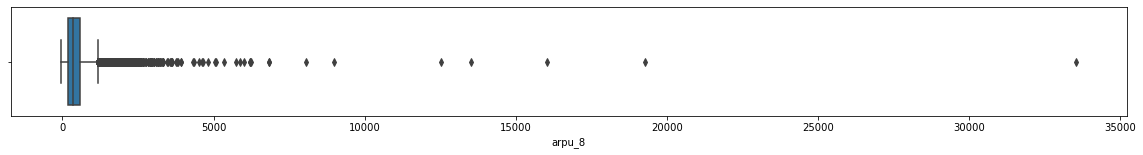

In [46]:
# plot boxplots to see outliers

columns = ['arpu_6', 'arpu_7', 'arpu_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,3)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,3)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

In [47]:
# Check value change across quantile distribution

churn_data_final[['arpu_6', 'arpu_7', 'arpu_8']].describe(percentiles=[.25,.5,.75,.9,.95,.99,.999,.9999])

arpu_6        arpu_7        arpu_8
count   28274.000000  28274.000000  28274.000000
mean      466.306722    478.053241    446.084974
std       442.920711    466.745100    486.112624
min       -24.420000    -28.930000    -34.330000
25%       209.221750    222.759000    182.782500
50%       366.387500    376.295500    343.098000
75%       605.631000    615.405750    583.503750
90%       912.710000    918.814200    893.124800
95%      1154.019500   1176.187200   1171.918500
99%      1836.220670   1878.622230   1878.682390
99.9%    3295.990275   3650.088366   3735.435246
99.99%  11007.961074   9648.186428  13943.705359
max     27731.088000  35145.834000  33543.624000

In [48]:
# see outlier rows

churn_data_final[churn_data_final['arpu_6']>6000].sort_values('arpu_6')

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
48388             0.0             0.0             0.0                    30   
69968             0.0             0.0             0.0                    30   
80414             0.0             0.0             0.0                    30   
98208             0.0             0.0             0.0                    30   
33019             0.0             0.0             0.0                    30   
67717             0.0             0.0             0.0                    30   
51314             0.0             0.0             0.0                    30   
38610             0.0             0.0             0.0                    30   

       last_date_of_month_7  last_date_of_month_8     arpu_6     arpu_7  \
48388                  31.0                  31.0   7283.872   7199.400   
69968                  31.0                  31.0   7748.779   7386.464   
80414                  31.0                  31.0   8598.530   4122.626   
98208                  31.0                  31.0  10877.945   6498.408   
33019                  31.0                  31.0  10955.066   8609.460   
67717                  31.0                  31.0  11261.349  16820.145   
51314                  31.0                  31.0  15487.684  14624.089   
38610                  31.0                  31.0  27731.088  35145.834   

          arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
48388   6194.049       125.69       209.93       171.08        550.13   
69968   6210.072       383.59       419.98       553.09       1448.96   
80414   8058.772       202.11       405.18       267.11        603.06   
98208   5880.292       147.84       107.26       146.56       1372.88   
33019  13505.996         0.00         0.00         0.00        177.53   
67717  12533.285         9.29        16.61        11.63       1493.98   
51314  16040.503         0.18         0.00         0.00       5905.14   
38610  33543.624         5.69         5.14         7.01       3231.81   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
48388       1005.83       1054.91         697.74         565.83   
69968       1645.58       1100.96           0.00           0.00   
80414        694.89        635.88           0.00           0.00   
98208        818.66        737.66           0.00           0.00   
33019         58.44        107.03           0.00           0.00   
67717       1921.29       1498.31           0.00           0.00   
51314       5490.28       5836.76           0.00           0.00   
38610       3868.59       3625.43           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
48388         210.29         675.83         670.01         238.39   
69968         190.68           0.00           0.00         313.16   
80414           0.00           0.00           0.00           0.00   
98208           0.00           0.00           0.00           0.00   
33019           0.00           0.00           0.00           0.00   
67717           0.00           0.00           0.00           0.00   
51314           1.00           0.00           0.00         139.98   
38610           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
48388              0.00              0.36              9.69              0.00   
69968            312.76            345.43            347.43            508.28   
80414            111.41            295.86            266.08            507.86   
98208            147.19            107.26            145.61             53.54   
33019              0.00              0.00              0.00            159.73   
67717              9.29             16.61             11.63             22.39   
51314              0.18              0.00              0.00              0.00   
38610              5.69              5.14              7.01              2.51   

     

In [49]:
# Drop rows with outlier values

churn_data_final = churn_data_final[churn_data_final['arpu_6']<=6000]
churn_data_final.shape

(28266, 179)

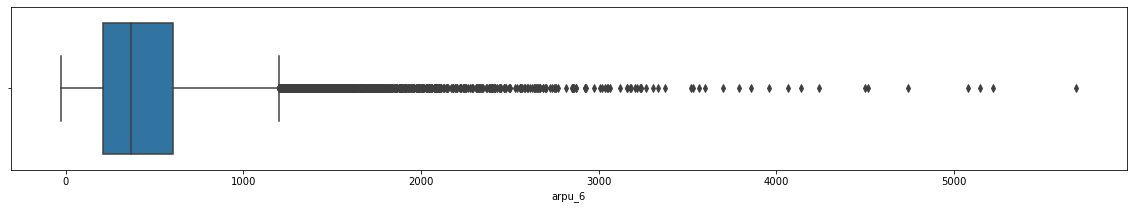

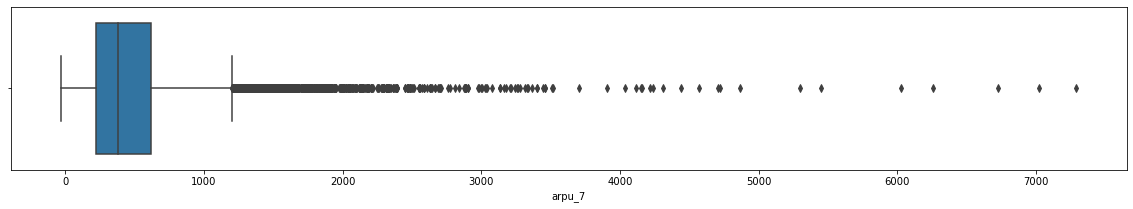

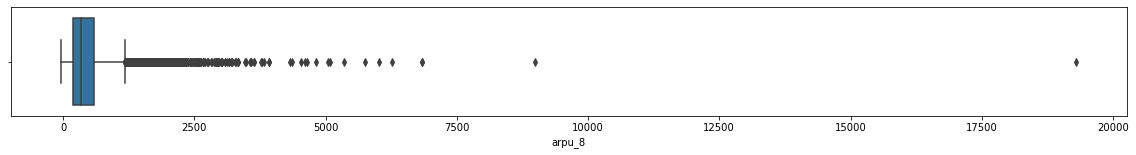

In [50]:
# plot boxplots to see outliers

columns = ['arpu_6', 'arpu_7', 'arpu_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,3)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,3)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

In [51]:
# see outlier rows
churn_data_final[churn_data_final['arpu_8']>8000]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
10484             0.0             0.0             0.0                    30   
93779             0.0             0.0             0.0                    30   

       last_date_of_month_7  last_date_of_month_8    arpu_6    arpu_7  \
10484                  31.0                  31.0  5220.209  5451.082   
93779                  31.0                  31.0  5687.240  7287.334   

          arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
10484   8989.682       144.46       183.68       159.36       1075.11   
93779  19295.904        47.54        57.38         3.64       1220.16   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
10484        941.49       1190.44         633.94         705.98   
93779       1404.43        328.64           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
10484         706.43        1219.58        1125.18        1349.81   
93779         122.19           0.00           0.00          98.78   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
10484               0.0              0.00               0.0              0.00   
93779               1.2              0.16               0.0             26.94   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
10484              0.00              0.00               0.0               0.0   
93779             27.36             12.19               4.4               0.0   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
10484               0.0               0.0               0.0               0.0   
93779               0.0               0.0               0.0               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
10484          0.00          0.00          0.00              0.00   
93779         32.54         27.53         12.19             46.34   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
10484              0.00               0.0              0.00              0.00   
93779             57.21               0.0            118.93              6.94   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
10484              0.00              0.00              0.00              0.00   
93779            137.29             46.66            104.31             21.41   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  \
10484               0.0               0.0               0.0          0.00   
93779               0.0               0.0               0.0        211.94   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
10484          0.00          0.00           0.0           0.0           0.0   
93779        168.48        158.71           0.0           0.0           0.0   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
10484          0.00          0.00          0.00         0.00          0.0   
93779       1023.21       1265.79         62.59        26.06          0.0   

       og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
10484          0.0            0.00            0.00            0.00   
93779          0.0         1293.78         1461.81          233.51   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
10484              0.00              0.00               0.0              0.00   
93779             12.91              1.76               0.0              4.78   

       loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
10484              0.00              0.00              0.00              0.00   
93779             65.33              0.91             57.23             31.54   

       loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
10484              0.

In [52]:
# Drop rows with outlier values

churn_data_final = churn_data_final[churn_data_final['arpu_8']<=8000]
churn_data_final.shape

(28264, 179)

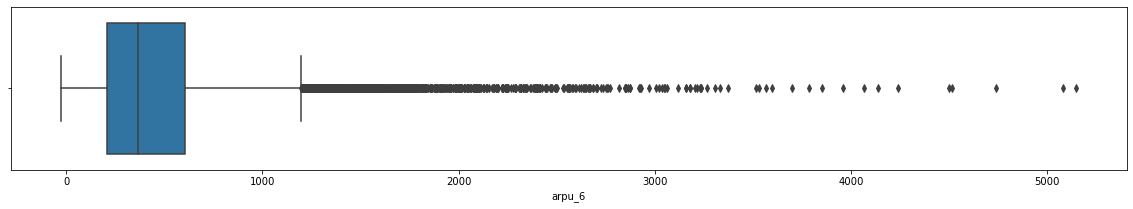

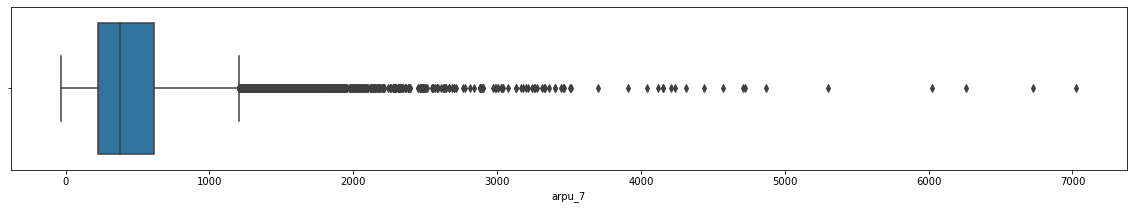

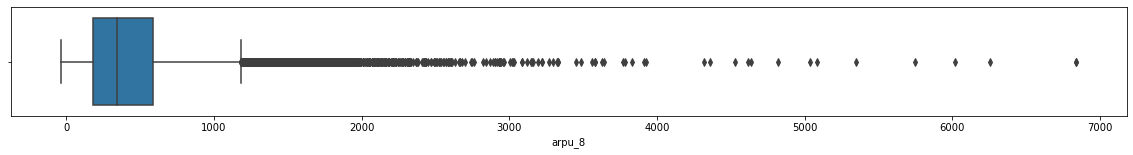

In [53]:
# plot boxplots to see outliers

columns = ['arpu_6', 'arpu_7', 'arpu_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,3)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,3)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

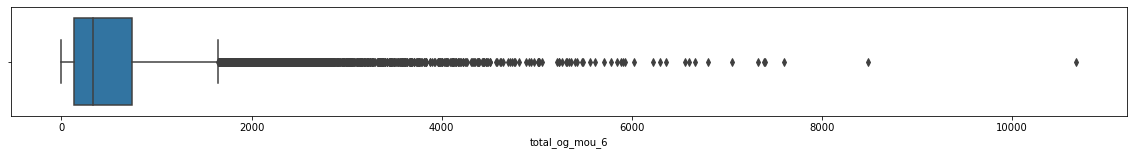

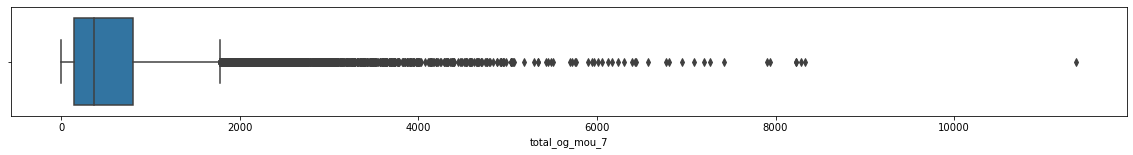

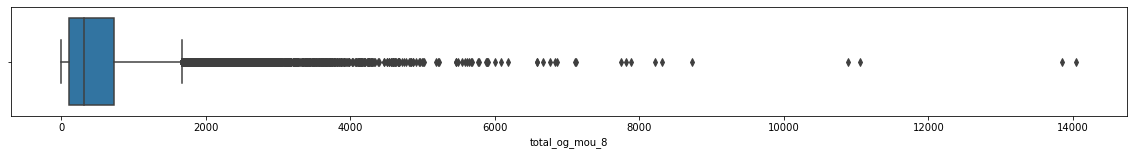

In [54]:
# plot boxplots to see outliers

columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

In [55]:
# Check value change across quantile distribution

churn_data_final[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe(percentiles=[.25,.5,.75,.9,.95,.99,.999,.9999])

total_og_mou_6  total_og_mou_7  total_og_mou_8
count     28264.000000    28264.000000    28264.000000
mean        554.908362      593.166590      539.177041
std         653.673366      689.277683      682.282112
min           0.000000        0.000000        0.000000
25%         133.455000      144.820000      107.690000
50%         335.210000      367.360000      310.970000
75%         740.685000      796.875000      730.387500
90%        1330.525000     1406.839000     1317.737000
95%        1806.048000     1895.716500     1819.887000
99%        3048.035000     3237.075200     3210.749000
99.9%      5333.554450     5743.691660     5660.032120
99.99%     7439.067495     8237.359291    10911.325956
max       10674.030000    11365.310000    14043.060000

In [56]:
# see outlier rows

churn_data_final[churn_data_final['total_og_mou_6']>8000]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
2505              0.0             0.0             0.0                    30   
55040             0.0             0.0             0.0                    30   

       last_date_of_month_7  last_date_of_month_8    arpu_6    arpu_7  \
2505                   31.0                  31.0  3157.411   796.111   
55040                  31.0                  31.0  3180.236  2136.734   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
2505   1664.808      6459.34      2325.94     10752.56       4213.94   
55040    62.500       122.01        66.74         4.18       8362.36   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
2505         289.19        294.18            0.0           0.00   
55040       5887.14         30.36            0.0           3.65   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
2505            0.00            0.0           0.00           0.00   
55040          12.76            0.0          19.18          34.54   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
2505            6431.33           2248.41          10752.56           4212.04   
55040              3.78              4.19              0.00             46.76   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
2505             271.53            286.71              0.00              1.51   
55040            105.14              0.00              0.83              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
2505               0.63               1.9               0.0              0.66   
55040              0.00               0.0               3.5              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
2505       10643.38       2521.46      11039.91             28.01   
55040         51.38        109.34          0.00            118.23   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
2505              77.53               0.0              0.00              1.36   
55040             61.54               0.0           8314.76           5760.31   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
2505                0.0               0.0               0.0               0.0   
55040               0.0               0.0               0.0               0.0   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  \
2505                0.0               0.0               0.0         28.01   
55040               0.0               0.0               0.0       8432.99   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
2505          78.89           0.0           0.0           0.0           0.0   
55040       5821.86           0.0           0.0           0.0           0.0   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
2505            1.9         14.78          6.83         0.73          0.0   
55040           0.0          7.24          0.00         3.98          0.0   

       og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
2505           0.0        10674.03         2615.14        11046.74   
55040          0.0         8488.36         5938.46            0.00   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
2505             241.03            114.93            146.39           1375.81   
55040              5.36              6.18              0.00             80.78   

       loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
2505            1264.78            658.33              0.00              0.00   
55040             75.06              0.00             11.51              8.94   

       loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
2505                0.0 

In [57]:
# Drop rows with outlier values

churn_data_final = churn_data_final[churn_data_final['total_og_mou_6']<=8000]
churn_data_final.shape

(28262, 179)

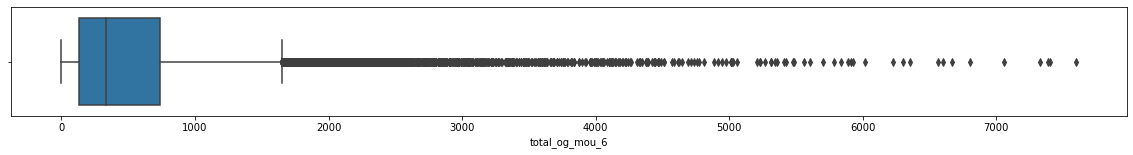

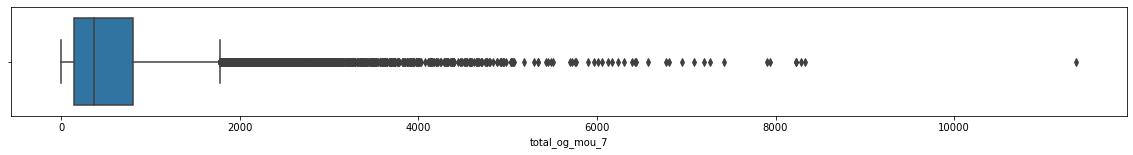

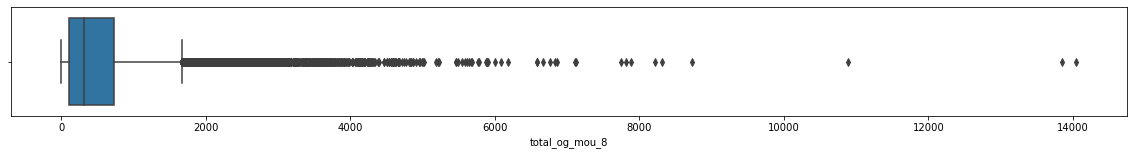

In [58]:
# plot boxplots to see outliers

columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

In [59]:
# see outlier rows

churn_data_final[churn_data_final['total_og_mou_7']>10000]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
33035             0.0             0.0             0.0                    30   

       last_date_of_month_7  last_date_of_month_8    arpu_6   arpu_7  \
33035                  31.0                  31.0  2854.958  4234.59   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
33035  5035.192       366.53      1692.81       291.94       6962.46   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
33035       9667.13      13547.84            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
33035            0.0            0.0            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
33035             20.86             40.83             34.38            204.99   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
33035             72.43             75.04              2.05              2.55   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
33035              0.33             20.93               2.6               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
33035        227.91        115.81        109.76            345.66   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
33035           1651.98            257.56           6430.08           9284.74   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
33035          13411.21               0.0               0.0               0.0   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  \
33035               0.0               0.0               0.0       6775.74   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
33035      10936.73      13668.78           0.0          0.18           0.0   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
33035        325.41        312.58         69.71         0.03          0.0   

       og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
33035          0.0         7329.11        11365.31        13848.26   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
33035             12.49             12.93              9.51             89.88   

       loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
33035             38.11             29.48              5.96              9.89   

       loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
33035             22.43        108.34         60.94         61.43   

       std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
33035             10.24              3.36              1.66             29.21   

       std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
33035             46.66             31.59               0.0               0.0   

       std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  \
33035               0.0               0.0               0.0               0.0   

       std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
33035         39.46         50.03         33.26          148.24   

       total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
33035          110.98           94.69          0.43           0.0   

       spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
33035           0.0           0.0           0.0           0.0          0.0   

       ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
33035          0.0          0.0                32                42   

       total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
33035                37              3360              4808              5909   

       max_rech_amt_6  max_re

In [60]:
# Drop rows with outlier values

churn_data_final = churn_data_final[churn_data_final['total_og_mou_7']<=10000]
churn_data_final.shape

(28261, 179)

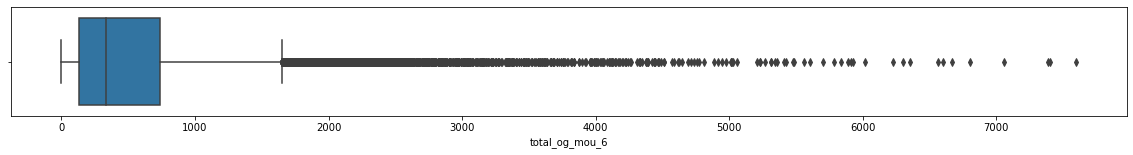

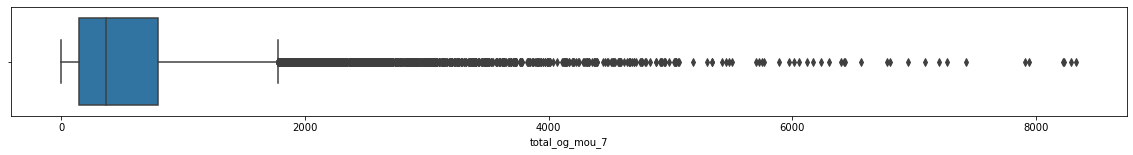

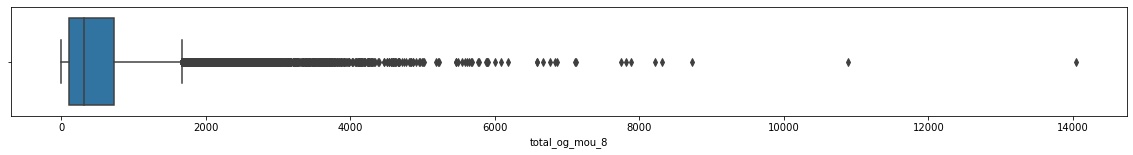

In [61]:
# plot boxplots to see outliers

columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

In [62]:
# see outlier rows

churn_data_final[churn_data_final['total_og_mou_8']>10000]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
27493             0.0             0.0             0.0                    30   
92272             0.0             0.0             0.0                    30   

       last_date_of_month_7  last_date_of_month_8    arpu_6    arpu_7  \
27493                  31.0                  31.0  1325.877  1474.408   
92272                  31.0                  31.0   251.667   963.879   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
27493  1386.445      3187.03      7741.53      9977.41        571.23   
92272  5748.252         3.73         3.68        35.71        232.29   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
27493        481.01        904.24           0.00           0.00   
92272       2573.91      14007.34          36.56           0.68   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
27493            0.0           0.00           0.00            0.0   
92272            0.0         236.03          28.88            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
27493           3157.86           7400.66           9760.56            317.14   
92272              0.00              3.68              8.54              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
27493            273.84            435.21              3.91              0.26   
92272             15.86             52.96              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
27493              1.05               0.0               0.0               0.0   
92272              0.00               0.0               0.0               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
27493       3478.93       7674.78      10196.83             29.16   
92272          0.00         19.54         61.51              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
27493            340.86            216.84            203.88            191.79   
92272              0.00             27.16              0.00           2529.16   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
27493            459.51               0.0               0.0              0.00   
92272          13950.04               0.0               0.0              2.85   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  \
27493               0.0               0.0               0.0        233.04   
92272               0.0               0.0               0.0          0.00   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
27493        532.66        676.36           0.0           0.0           0.0   
92272       2529.16      13980.06           0.0           0.0           0.0   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
27493         46.53         16.71          9.66         1.41          0.0   
92272          0.00          0.00          1.48         0.00          0.0   

       og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
27493          0.0         3759.93         8224.16        10882.86   
92272          0.0            0.00         2548.71        14043.06   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
27493              6.61             31.56              8.36             46.29   
92272              0.00              3.50              5.53              0.00   

       loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
27493            131.99             90.29               0.0              0.76   
92272             21.04             17.33               0.0              0.00   

       loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
27493              3.08 

In [63]:
# Drop rows with outlier values

churn_data_final = churn_data_final[churn_data_final['total_og_mou_8']<=10000]
churn_data_final.shape

(28259, 179)

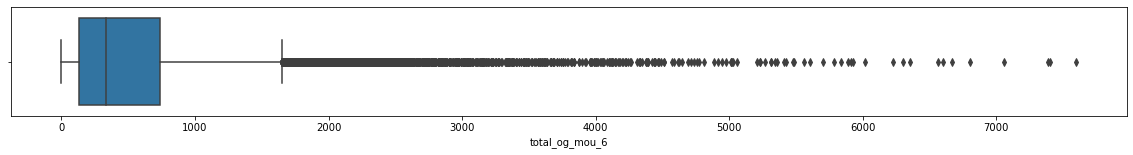

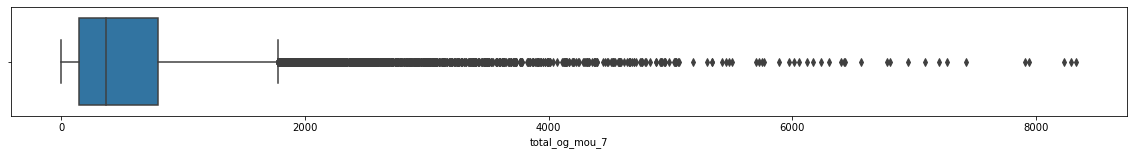

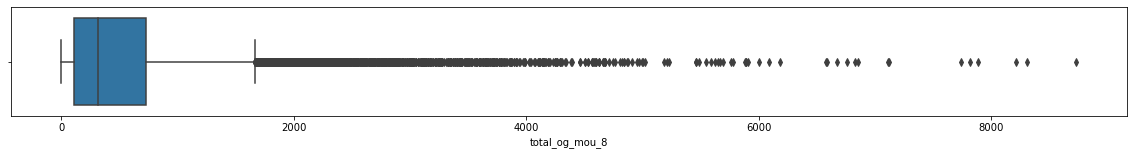

In [64]:
# plot boxplots to see outliers

columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

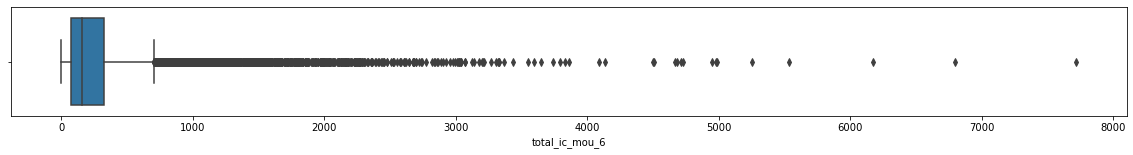

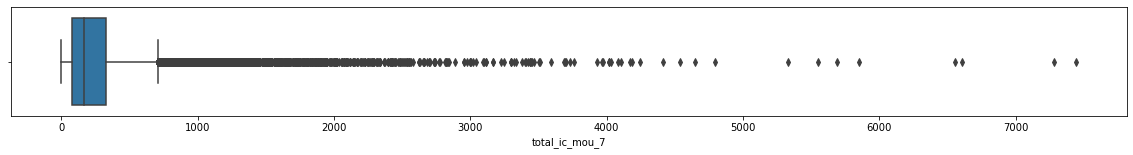

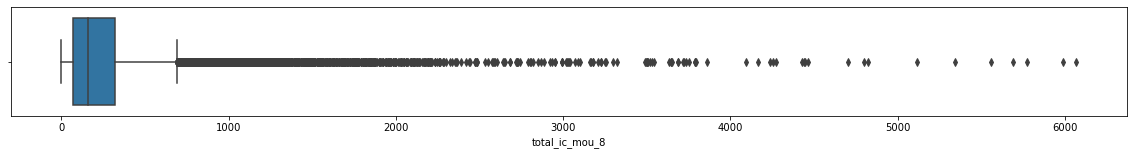

In [65]:
# plot boxplots to see outliers

columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

In [66]:
# Check value change across quantile distribution

churn_data_final[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].describe(percentiles=[.25,.5,.75,.9,.95,.99,.999,.9999])

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     28259.000000    28259.000000    28259.000000
mean        262.241652      273.147602      260.464502
std         348.395409      360.401643      352.512719
min           0.000000        0.000000        0.000000
25%          69.050000       79.975000       68.210000
50%         157.930000      166.780000      156.030000
75%         323.710000      330.085000      317.500000
90%         592.164000      606.010000      584.994000
95%         847.247000      868.143000      850.245000
99%        1699.134600     1768.916000     1724.049200
99.9%      3294.427500     3568.708620     3678.993800
99.99%     5645.875740     6564.190376     5703.536436
max        7716.140000     7442.860000     6066.630000

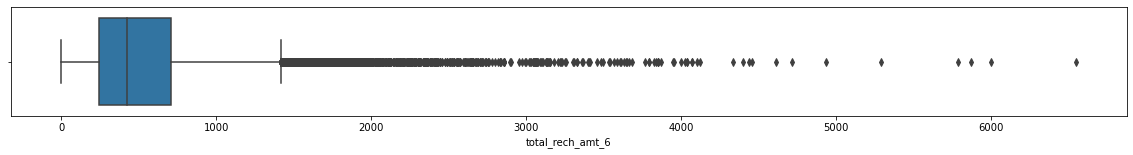

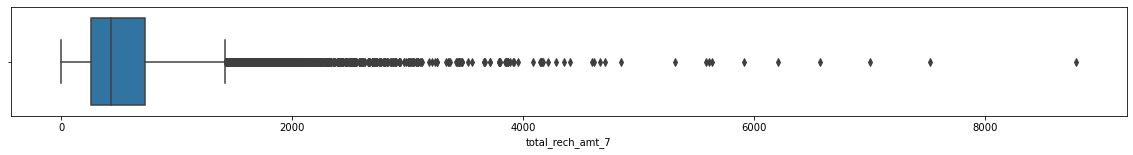

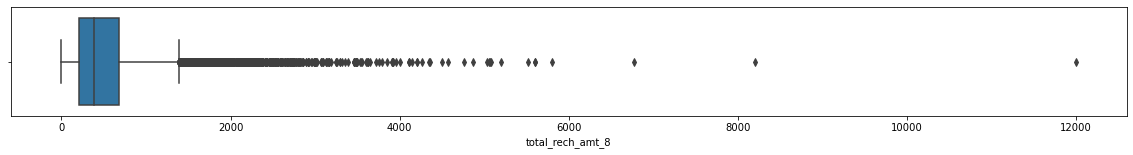

In [67]:
# plot boxplots to see outliers

columns = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

In [68]:
# Check value change across quantile distribution

churn_data_final[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe(percentiles=[.25,.5,.75,.9,.95,.99,.999,.9999])

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count       28259.000000      28259.000000      28259.000000
mean          540.562617        553.735907        511.006511
std           449.329854        460.840012        468.280620
min             0.000000          0.000000          0.000000
25%           240.000000        253.000000        206.000000
50%           426.000000        432.000000        391.000000
75%           710.000000        720.000000        680.000000
90%          1070.000000       1087.000000       1046.000000
95%          1356.000000       1387.000000       1376.000000
99%          2198.260000       2218.000000       2192.420000
99.9%        3792.226000       3880.130000       3911.226000
99.99%       5799.807000       6644.906000       5970.367600
max          6549.000000       8785.000000      12000.000000

In [69]:
# see outlier rows

churn_data_final[churn_data_final['total_rech_amt_8']>8000]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  \
66157             0.0             0.0             0.0                    30   
68170             0.0             0.0             0.0                    30   

       last_date_of_month_7  last_date_of_month_8    arpu_6    arpu_7  \
66157                  31.0                  31.0  4067.544  4569.749   
68170                  31.0                  31.0  3789.095  7024.226   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
66157  6838.828       142.28        87.91        68.81        644.04   
68170  6836.441        43.23        46.21        38.38        357.14   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
66157        677.34        816.54          41.33           8.29   
68170        523.66        455.93           6.43          54.93   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
66157           6.81          32.39          10.53          32.59   
68170          79.23          16.71          83.56          28.20   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
66157             48.89             46.08             21.23            205.43   
68170             10.74             11.23             27.40             26.04   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
66157            106.69            166.68               0.0               0.0   
68170             40.16             13.24               0.0               0.0   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
66157               0.0               0.0               0.0               0.0   
68170               0.0               0.0               0.0               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
66157        254.33        152.78        187.91             90.54   
68170         36.79         51.39         40.64             26.86   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
66157             36.98             47.58              0.00              0.00   
68170              0.63              0.00             88.23              9.56   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
66157               0.0               0.0               0.0               0.0   
68170               0.0               0.0               0.0               0.0   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  \
66157               0.0               0.0               0.0         90.54   
68170               0.0               0.0               0.0        115.09   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
66157         36.98         47.58        409.04        564.96        617.26   
68170         10.19          0.00        231.76        449.68        425.46   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
66157           0.0           0.0           0.0          0.0          0.0   
68170           0.0           0.0           0.0          0.0          0.0   

       og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
66157          0.0          753.93          754.73          852.76   
68170          0.0          383.66          511.28          466.11   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
66157             24.46             78.26             36.26            232.78   
68170              5.46             42.61             18.83              1.90   

       loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
66157            154.74            248.99               0.0               0.0   
68170             55.39             16.86               0.0               0.0   

       loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
66157               0.0 

In [70]:
# Drop rows with outlier values

churn_data_final = churn_data_final[churn_data_final['total_rech_amt_8']<=8000]
churn_data_final.shape

(28257, 179)

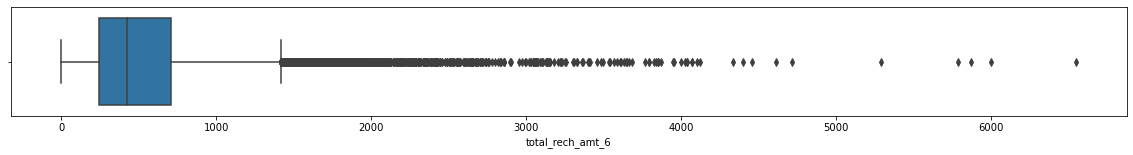

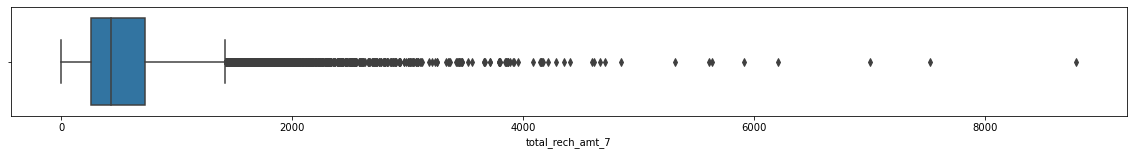

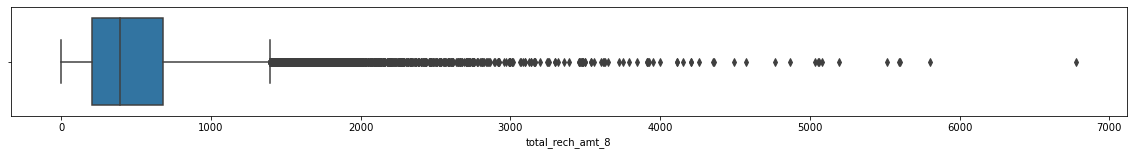

In [71]:
# plot boxplots to see outliers

columns = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

sns.boxplot(churn_data_final[columns[0]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[1]])
plt.gcf().set_size_inches(20,2)
plt.show()

sns.boxplot(churn_data_final[columns[2]])
plt.gcf().set_size_inches(20,2)
plt.show()

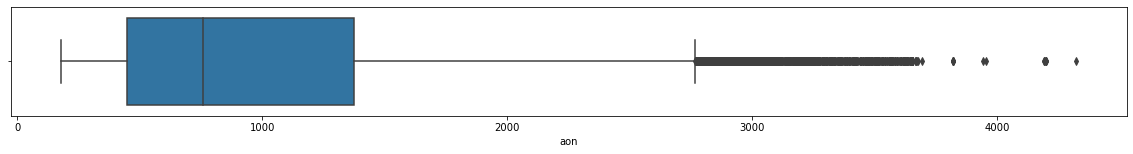

In [72]:
# plot boxplots to see outliers

sns.boxplot(churn_data_final['aon'])
plt.gcf().set_size_inches(20,2)
plt.show()


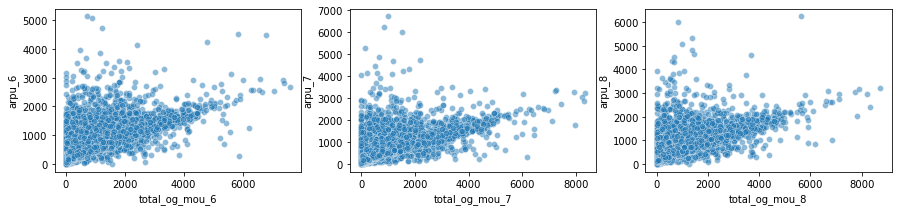

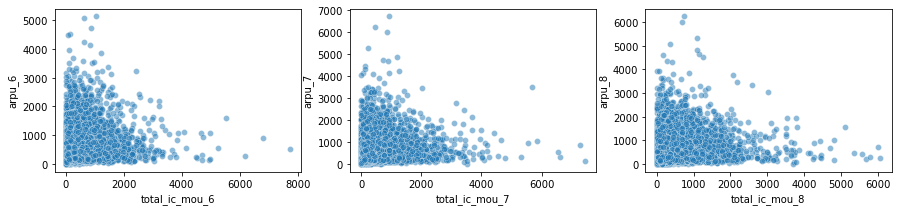

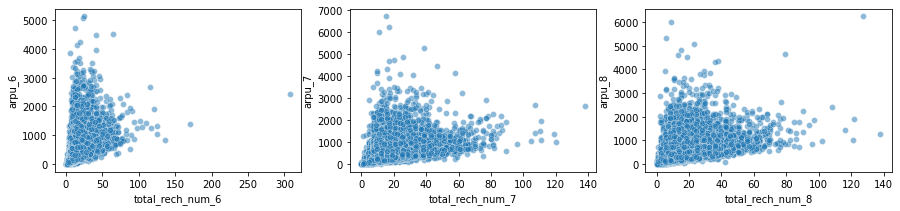

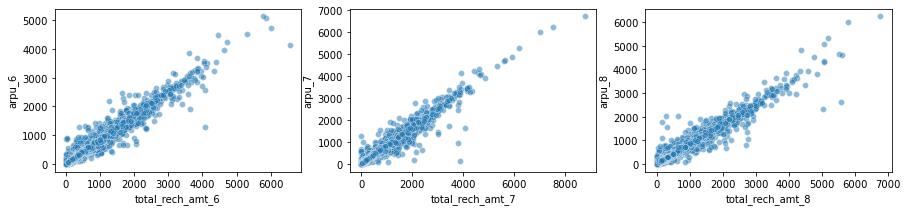

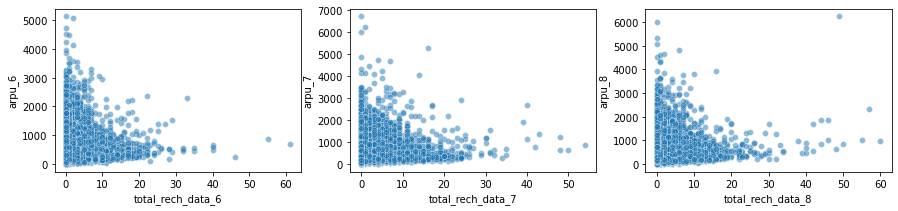

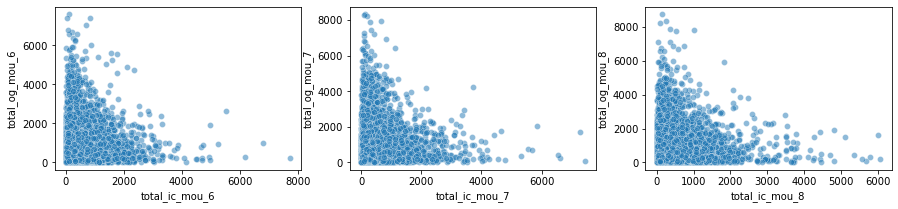

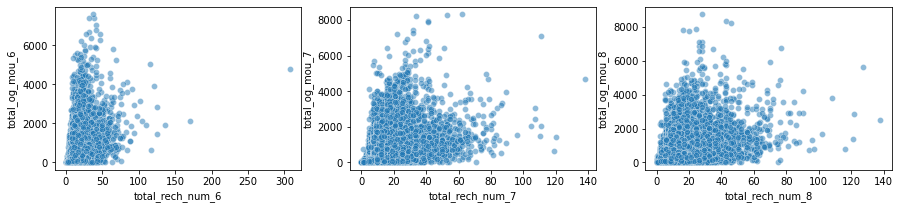

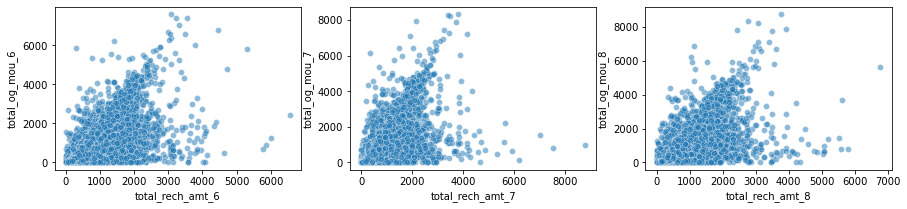

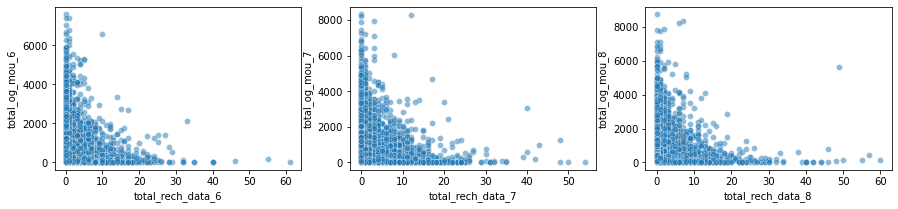

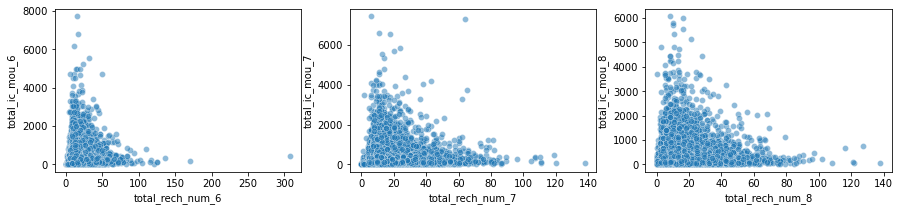

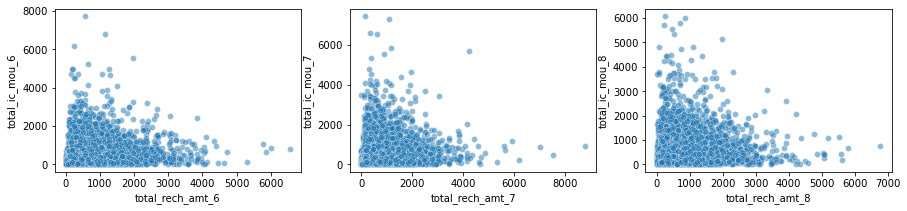

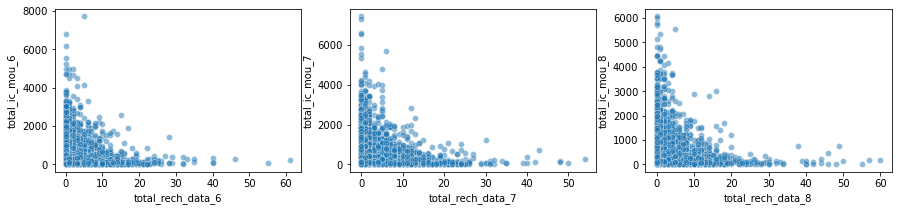

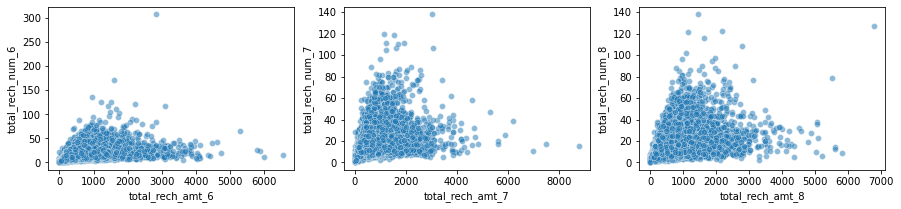

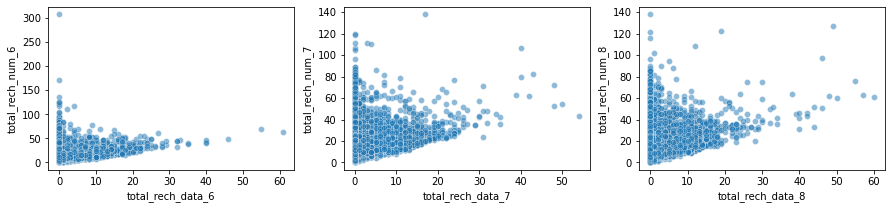

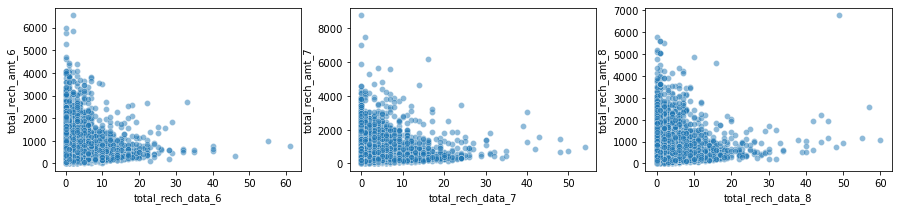

In [73]:
# plot scatter plots to see outliers

total_cols=['arpu_','total_og_mou_','total_ic_mou_','total_rech_num_','total_rech_amt_','total_rech_data_']
 
for col in total_cols:
    col_x = append_lists([col],['6','7','8'])
    
    for i in range(total_cols.index(col)+1, len(total_cols)):

        col_y = append_lists([total_cols[i]],['6','7','8'])

        fig, (ax1,ax2,ax3) = plt.subplots(1, 3)

        ax1 = sns.scatterplot(data=churn_data_final, y=col_x[0], x=col_y[0], alpha=.5, ax=ax1)

        ax2 = sns.scatterplot(data=churn_data_final, y=col_x[1], x=col_y[1], alpha=.5, ax=ax2)

        ax3 = sns.scatterplot(data=churn_data_final, y=col_x[2], x=col_y[2], alpha=.5, ax=ax3)

        fig.set_size_inches(15,3)
        plt.show()

In [74]:
# drop columns with same value in all rows

No_variance_cols = churn_data_final.nunique()[churn_data_final.nunique()==1].index
for col in No_variance_cols:
    print(churn_data_final[col].value_counts())
    print("========================")
churn_data_final.shape

0.0    28257
Name: loc_og_t2o_mou, dtype: int64
0.0    28257
Name: std_og_t2o_mou, dtype: int64
0.0    28257
Name: loc_ic_t2o_mou, dtype: int64
30    28257
Name: last_date_of_month_6, dtype: int64
31.0    28257
Name: last_date_of_month_7, dtype: int64
31.0    28257
Name: last_date_of_month_8, dtype: int64
0.0    28257
Name: std_og_t2c_mou_6, dtype: int64
0.0    28257
Name: std_og_t2c_mou_7, dtype: int64
0.0    28257
Name: std_og_t2c_mou_8, dtype: int64
0.0    28257
Name: std_ic_t2o_mou_6, dtype: int64
0.0    28257
Name: std_ic_t2o_mou_7, dtype: int64
0.0    28257
Name: std_ic_t2o_mou_8, dtype: int64


(28257, 179)

In [75]:
churn_data_final.drop(columns=No_variance_cols, inplace=True)
churn_data_final.shape

(28257, 167)

## 5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

#### `Class Imbalance is handled as below`
- data is split into train and test using `stratified` method
- in logistic reression, `freq_weight` parameter is used while creating model
- in random forest, `class_weight` parameter is used while creating model

## Model Building
Let's start by splitting our data into a training set and a test set.

In [76]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_data_final.drop(['churn'],axis=1)

# Putting response variable to y
y = churn_data_final['churn']

y.head()

3     0
6     0
8     0
17    0
21    0
Name: churn, dtype: int32

In [77]:
X.shape, y.shape

((28257, 166), (28257,))

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19779, 166), (8478, 166), (19779,), (8478,))

In [80]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.96648
 1    0.03352
 Name: churn, dtype: float64,
 0    0.966502
 1    0.033498
 Name: churn, dtype: float64)

### Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
# select all continuous numerical columns

cat_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6', 'fb_user_7', 'fb_user_8']
num_columns = [ x for x in list(X_train.columns) if x not in cat_columns]
len(num_columns)

160

In [83]:
# Scale all continuous columns

scaler = StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
72077 -0.569101 -0.702485 -0.368581    -0.473047    -0.442910    -0.281113   
21300  0.330671  0.224073  1.121582     2.059063     2.357285     3.965943   
78227 -1.002565 -0.559580 -0.620103    -0.546264    -0.156298    -0.438016   
40227 -0.729464 -0.077657 -0.327506    -0.120523     0.131179    -0.133255   
60279 -0.599377 -0.736245 -0.530775    -0.245992    -0.352946    -0.381378   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
72077     -0.415916     -0.387062     -0.266364      -0.185901      -0.134818   
21300     -0.347714     -0.413869     -0.195055      -0.185901      -0.134818   
78227     -0.536671     -0.528332     -0.099376      -0.185901      -0.134818   
40227     -0.417396     -0.398043     -0.274035      -0.185901      -0.134818   
60279     -0.553531     -0.562967     -0.486494      -0.185901      -0.134818   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
72077      -0.140703      -0.207182       -0.17948      -0.162111   
21300      -0.140703      -0.207182       -0.17948      -0.162111   
78227      -0.140703      -0.207182       -0.03932      -0.162111   
40227      -0.140703      -0.207182       -0.17948      -0.162111   
60279       0.230082      -0.207182       -0.17948       0.024897   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
72077         -0.164616         -0.093600          0.195450          0.012986   
21300         -0.175118         -0.135441         -0.175401         -0.542445   
78227         -0.325944         -0.307604         -0.316497         -0.568589   
40227         -0.326586         -0.285828         -0.301635         -0.558874   
60279         -0.183876         -0.243486         -0.247482         -0.387965   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
72077          0.095701          0.251849         -0.246993         -0.230109   
21300         -0.576011         -0.586383         -0.246993         -0.230109   
78227         -0.527016         -0.551453         -0.246993         -0.230109   
40227         -0.569246         -0.586052         -0.246993         -0.230109   
60279         -0.423222         -0.374435         -0.210336         -0.230109   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
72077         -0.238073         -0.216439         -0.214560         -0.228184   
21300         -0.238073          1.414445          1.347613          2.181897   
78227         -0.238073         -0.216439          1.073758          1.316936   
40227         -0.114727         -0.173677          0.213213          1.801358   
60279         -0.238073         -0.198621         -0.191572         -0.228184   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
72077     -0.104668     -0.014205      0.276281         -0.423205   
21300     -0.472868     -0.457802     -0.494099          2.456054   
78227     -0.584493     -0.544119     -0.563057         -0.416684   
40227     -0.578540     -0.555449     -0.570523          0.066805   
60279     -0.376311     -0.436498     -0.406373         -0.154843   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
72077         -0.436797         -0.410238         -0.436377         -0.444850   
21300          2.787825          4.633692         -0.165321         -0.318937   
78227          0.007261         -0.310559         -0.239780         -0.365687   
40227          0.330498          0.028840         -0.097094         -0.115742   
60279         -0.247313         -0.292691         -0.360491         -0.370820   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
72077         -0.413661         -0.110726         -0.037590          0.915992   
21300         -0.199023         -0.110726         -0.107492         -0.107445   
78227          0.169171         

In [84]:
# transform test data into the same scale

X_test[num_columns] = scaler.transform(X_test[num_columns])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
68928  0.488126  0.316539  0.469891    -0.333191    -0.378677    -0.393769   
56731 -0.414125 -0.708632 -0.270658     0.127160    -0.264712    -0.252561   
44093  1.737439  1.988350  1.645603     3.947154     3.036347     3.438730   
20690 -0.440646 -0.728765 -0.526993    -0.219865    -0.127865     0.153661   
82584 -0.610472 -0.743523 -0.240688    -0.516928    -0.522173    -0.363311   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
68928     -0.527030     -0.576296     -0.535412      -0.185901      -0.134818   
56731     -0.380828     -0.237203     -0.116675      -0.185901      -0.059876   
44093     -0.466496     -0.509544     -0.254245      -0.185901      -0.134818   
20690     -0.597071     -0.617892     -0.608633      -0.185901      -0.134818   
82584     -0.293748     -0.358923     -0.154431      -0.185901      -0.134818   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
68928      -0.140703      -0.207182      -0.179480      -0.162111   
56731       0.912947      -0.207182      -0.134023       0.664434   
44093      -0.140703      -0.207182      -0.179480      -0.162111   
20690      -0.140703      -0.207182      -0.179480      -0.162111   
82584      -0.140703      -0.207182      -0.179480      -0.162111   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
68928          0.121123          0.016615         -0.040576         -0.270493   
56731          0.703745          0.141680         -0.003886         -0.099364   
44093         -0.285864         -0.307896         -0.315336         -0.492321   
20690         -0.296870         -0.229928         -0.164580         -0.534408   
82584         -0.254268         -0.250244          0.023237         -0.367871   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
68928         -0.354438         -0.371737          0.366118         -0.230109   
56731         -0.152883          0.090545         -0.246993         -0.187635   
44093         -0.507135         -0.477617         -0.246993         -0.230109   
20690         -0.555992         -0.547572         -0.246993         -0.177833   
82584         -0.495663         -0.328335         -0.169366         -0.230109   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
68928          0.172828         -0.216439         -0.214560         -0.228184   
56731         -0.238073         -0.216439         -0.074634         -0.228184   
44093         -0.238073          2.483487         -0.214560         -0.228184   
20690         -0.207047         -0.216439         -0.214560         -0.228184   
82584         -0.006516         -0.216439         -0.214560         -0.228184   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
68928     -0.085489     -0.217807     -0.254815         -0.423205   
56731      0.366702     -0.006661      0.045422         -0.224430   
44093     -0.509674     -0.531998     -0.515536          4.660180   
20690     -0.543978     -0.507134     -0.461269         -0.062460   
82584     -0.405727     -0.485858     -0.193233         -0.423205   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
68928         -0.427122         -0.410238         -0.420317         -0.421716   
56731         -0.369221         -0.370938         -0.327870         -0.157311   
44093          3.663685          4.108759         -0.281250         -0.273874   
20690          0.002123          0.281349         -0.366909         -0.364748   
82584         -0.436797         -0.410238         -0.070417         -0.133044   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
68928         -0.381652         -0.110726         -0.107492         -0.107445   
56731         -0.257994         -0.110726         -0.107492         -0.107445   
44093          0.015564         

### Model - 1: Building PCA Model

In [85]:
from sklearn.decomposition import PCA
# PCA model

pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [86]:
pca.components_

array([[ 1.52591331e-01,  1.63017037e-01,  1.55841534e-01, ...,
         2.64015034e-02,  2.57791013e-02,  2.86431891e-02],
       [-9.76801293e-02, -1.02833653e-01, -9.52419628e-02, ...,
         1.47436879e-01,  1.49557719e-01,  1.43854304e-01],
       [-4.31779679e-02, -6.86700664e-02, -5.95455207e-02, ...,
        -4.35523099e-02, -4.59403161e-02, -4.72576821e-02],
       ...,
       [-0.00000000e+00,  3.39797109e-16,  2.22459378e-16, ...,
         1.02067318e-16, -7.73015004e-17, -7.26201173e-17],
       [ 0.00000000e+00,  4.07982632e-17,  8.72967870e-17, ...,
        -6.37281971e-17,  6.40706239e-18,  1.42773758e-17],
       [-0.00000000e+00, -3.24668577e-16,  2.84691521e-17, ...,
         6.60086096e-17, -5.14083757e-17, -7.56746083e-17]])

In [87]:
pca.explained_variance_ratio_

array([1.29083412e-01, 9.58977948e-02, 6.29262130e-02, 4.88442733e-02,
       3.58477441e-02, 3.04884817e-02, 2.84343683e-02, 2.26968347e-02,
       2.14494092e-02, 1.99596058e-02, 1.95897345e-02, 1.93290954e-02,
       1.85242863e-02, 1.65259604e-02, 1.57602939e-02, 1.53932297e-02,
       1.47797351e-02, 1.45547435e-02, 1.29129943e-02, 1.25390424e-02,
       1.19176984e-02, 1.16942152e-02, 1.09066252e-02, 1.04961245e-02,
       9.65461365e-03, 8.92696237e-03, 8.72614410e-03, 8.25810081e-03,
       8.10608344e-03, 7.60152293e-03, 7.49747259e-03, 7.28879875e-03,
       7.07068281e-03, 6.80733172e-03, 6.43198593e-03, 6.33141737e-03,
       6.06742350e-03, 5.86104131e-03, 5.78530000e-03, 5.75942606e-03,
       5.52497420e-03, 5.44154457e-03, 5.32113541e-03, 5.22888160e-03,
       5.06128289e-03, 4.97992738e-03, 4.88362304e-03, 4.74164905e-03,
       4.64029430e-03, 4.51760328e-03, 4.42102839e-03, 4.34189009e-03,
       4.17724391e-03, 4.00338715e-03, 3.89714286e-03, 3.75423339e-03,
      

In [88]:
# cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [89]:
# display cumulative variance of PCAs

t = pd.DataFrame(columns=['PCA_component','cumu_sum'])
t['PCA_component'] = [x for x in range(len(var_cumu))]
t['cumu_sum'] = var_cumu*100
t.set_index('PCA_component',drop=True,inplace=True)
t

cumu_sum
PCA_component            
0               12.908341
1               22.498121
2               28.790742
3               33.675169
4               37.259944
5               40.308792
6               43.152229
7               45.421912
8               47.566853
9               49.562814
10              51.521787
11              53.454697
12              55.307125
13              56.959721
14              58.535751
15              60.075074
16              61.553047
17              63.008522
18              64.299821
19              65.553725
20              66.745495
21              67.914917
22              69.005579
23              70.055192
24              71.020653
25              71.913349
26              72.785964
27              73.611774
28              74.422382
29              75.182534
30              75.932282
31              76.661161
32              77.368230
33              78.048963
34              78.692161
35              79.325303
36              79.932046
37              80.518150
38              81.096680
39              81.672622
40              82.225120
41              82.769274
42              83.301388
43              83.824276
44              84.330404
45              84.828397
46              85.316759
47              85.790924
48              86.254954
49              86.706714
50              87.148817
51              87.583006
52              88.000730
53              88.401069
54              88.790783
55              89.166206
56              89.523330
57              89.868349
58              90.206277
59              90.536767
60              90.859242
61              91.173980
62              91.484827
63              91.785483
64              92.083286
65              92.366384
66              92.642045
67              92.910507
68              93.161148
69              93.401411
70              93.636242
71              93.866651
72              94.090011
73              94.307659
74              94.519113
75              94.729002
76              94.928643
77              95.121088
78              95.309343
79              95.495161
80              95.675681
81              95.855657
82              96.030251
83              96.203345
84              96.375824
85              96.543737
86              96.704639
87              96.858299
88              97.010450
89              97.155933
90              97.296683
91              97.434515
92              97.570765
93              97.701496
94              97.826482
95              97.950527
96              98.071336
97              98.189535
98              98.303590
99              98.416887
100             98.520944
101             98.621219
102             98.717188
103             98.809689
104             98.894278
105             98.977124
106             99.055066
107             99.131726
108             99.206697
109             99.279169
110             99.349758
111             99.416655
112             99.474595
113             99.527523
114             99.577683
115             99.625266
116             99.672454
117             99.717218
118             99.754454
119             99.787658
120             99.817290
121             99.844821
122             99.868808
123             99.891677
124             99.912657
125             99.933082
126             99.951307
127             99.964305
128             99.973190
129             99.980003
130             99.984774
131             99.989254
132             99.993595
133             99.996983
134             99.998927
135             99.999756
136             99.999940
137             99.999983
138            100.000000
139            100.000000
140            100.000000
141            100.000000
142            100.000000
143            100.000000
144            100.000000
145            100.000000
146            100.000000
147            100.000000
148            100.000000
149            100.000000
150            100.000000
151            100.000000
152          

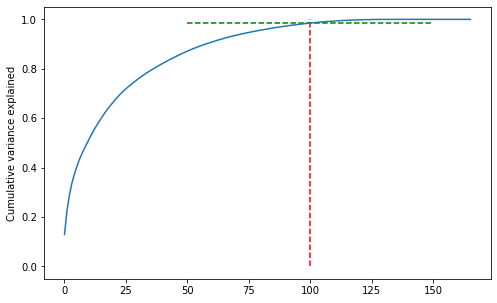

In [90]:
# plotting cumulative variance of PCA compoments
# 90 % variance in data is covered by first 60 PCA components

fig = plt.figure(figsize=[8,5])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=150, xmin=50, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [91]:
# run PCA for 60 components

from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=60)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(19779, 60)

<AxesSubplot:>

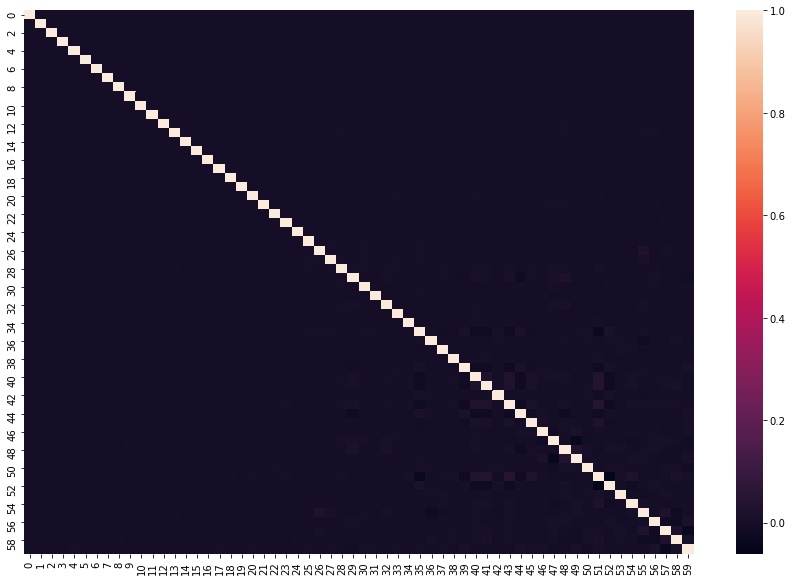

In [92]:
# Plot correlation matrix for pca components to see no correlation

corrmat = np.corrcoef(df_train_pca.transpose())

plt.figure(figsize=[15,10])
sns.heatmap(corrmat)

In [93]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8478, 60)

### Model - 1a - Logistic regression model with PCA
#### Applying logistic regression on Principal components data

In [94]:
from sklearn.linear_model import LogisticRegression
# Linear regression model 

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca, y_train)

#### Finding Optimal Cutoff Point

In [95]:
# create a df to save model predictions

y_train_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_train_pred_final['churn'] = y_train.values

In [96]:
# get model prediction probabilities

pred_probs_train = model_pca.predict_proba(df_train_pca)

y_train_pred_final['churn_prob'] = pred_probs_train[:,1]
y_train_pred_final.head()

churn  churn_prob
0      0    0.039514
1      0    0.065227
2      0    0.135752
3      0    0.214100
4      0    0.227653

In [97]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
numbers.extend([0.42,0.44,0.46,0.48,0.505,0.51,0.52,0.54,0.56,0.58])

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.42  \
0      0    0.039514    1    0    0    0    0    0    0    0    0    0     0   
1      0    0.065227    1    0    0    0    0    0    0    0    0    0     0   
2      0    0.135752    1    1    0    0    0    0    0    0    0    0     0   
3      0    0.214100    1    1    1    0    0    0    0    0    0    0     0   
4      0    0.227653    1    1    1    0    0    0    0    0    0    0     0   

   0.44  0.46  0.48  0.505  0.51  0.52  0.54  0.56  0.58  
0     0     0     0      0     0     0     0     0     0  
1     0     0     0      0     0     0     0     0     0  
2     0     0     0      0     0     0     0     0     0  
3     0     0     0      0     0     0     0     0     0  
4     0     0     0      0     0     0     0     0     0

In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df = cutoff_df.sort_index()
cutoff_df

prob  accuracy     sensi     speci
0.000  0.000  0.033520  1.000000  0.000000
0.100  0.100  0.415896  0.980392  0.396317
0.200  0.200  0.555994  0.968326  0.541693
0.300  0.300  0.664745  0.938160  0.655263
0.400  0.400  0.759796  0.901961  0.754865
0.420  0.420  0.776430  0.892911  0.772390
0.440  0.440  0.793670  0.882353  0.790594
0.460  0.460  0.807574  0.868778  0.805451
0.480  0.480  0.822286  0.855204  0.821145
0.500  0.500  0.834926  0.843137  0.834641
0.505  0.505  0.837504  0.835596  0.837571
0.510  0.510  0.840487  0.834087  0.840709
0.520  0.520  0.845998  0.831071  0.846516
0.540  0.540  0.856818  0.817496  0.858182
0.560  0.560  0.868800  0.802413  0.871103
0.580  0.580  0.878103  0.790347  0.881147
0.600  0.600  0.887254  0.784314  0.890824
0.700  0.700  0.919511  0.695324  0.927286
0.800  0.800  0.940543  0.541478  0.954384
0.900  0.900  0.953789  0.313725  0.975989

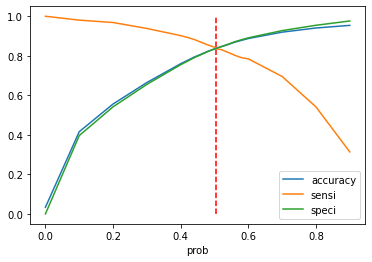

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.505, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [100]:
# Optimal cut off is chosen as 0.52

optimal_cut_off = 0.505
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.42  \
0      0    0.039514    1    0    0    0    0    0    0    0    0    0     0   
1      0    0.065227    1    0    0    0    0    0    0    0    0    0     0   
2      0    0.135752    1    1    0    0    0    0    0    0    0    0     0   
3      0    0.214100    1    1    1    0    0    0    0    0    0    0     0   
4      0    0.227653    1    1    1    0    0    0    0    0    0    0     0   

   0.44  0.46  0.48  0.505  0.51  0.52  0.54  0.56  0.58  predicted  
0     0     0     0      0     0     0     0     0     0          0  
1     0     0     0      0     0     0     0     0     0          0  
2     0     0     0      0     0     0     0     0     0          0  
3     0     0     0      0     0     0     0     0     0          0  
4     0     0     0      0     0     0     0     0     0          0

#### Evaluating Model on train data

In [101]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score 

In [102]:
metrics_df = pd.DataFrame(columns=['model','train_test','roc_auc','accuracy','recall'])

rou_auc_metric = roc_auc_score(y_train_pred_final.churn, y_train_pred_final.churn_prob)
accuracy_metric = accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)
recall_metric = recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)


temp = pd.Series(['Logistic Regression with PCA','Train',rou_auc_metric,accuracy_metric,recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596

#### Making predictions on the test set

In [103]:
# create a df to save model predictions

y_test_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_test_pred_final['churn'] = y_test.values

In [104]:
# get model prediction probabilities

pred_probs_test = model_pca.predict_proba(df_test_pca)

y_test_pred_final['churn_prob'] = pred_probs_test[:,1]
y_test_pred_final.head()

churn  churn_prob
0      0    0.150869
1      0    0.022820
2      0    0.208204
3      0    0.303295
4      0    0.130385

In [105]:
y_test_pred_final['predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_test_pred_final.head()

churn  churn_prob  predicted
0      0    0.150869          0
1      0    0.022820          0
2      0    0.208204          0
3      0    0.303295          0
4      0    0.130385          0

In [106]:
rou_auc_metric = roc_auc_score(y_test_pred_final.churn, y_test_pred_final.churn_prob)

accuracy_metric = accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)
recall_metric = recall_score(y_test_pred_final.churn, y_test_pred_final.predicted)

temp = pd.Series(['Logistic Regression with PCA','Test',rou_auc_metric,accuracy_metric, recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676

### Model - 1b: Random Forest with PCA

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [108]:
# Set parametes to tune

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [109]:
# initiate grid search object

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [110]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.6min finished


Wall time: 6min 34s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [111]:
grid_search.best_score_

0.7859255202628697

In [112]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       min_samples_leaf=50, n_estimators=25, n_jobs=-1,
                       random_state=42)

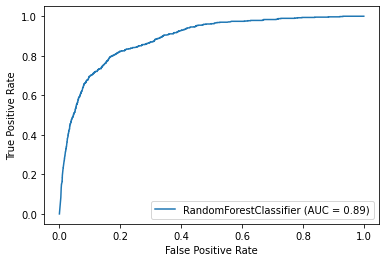

In [113]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

In [114]:
y_train_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_train_pred_final['churn'] = y_train.values

pred_probs_train = rf_best.predict_proba(df_train_pca)

y_train_pred_final['churn_prob'] = pred_probs_train[:,1]
y_train_pred_final.head()

churn  churn_prob
0      0    0.263307
1      0    0.448884
2      0    0.528187
3      0    0.405399
4      0    0.264646

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
numbers.extend([0.42, 0.44, 0.46, 0.48, 0.49, 0.491, 0.492, 0.494, 0.496, 0.498,0.52, 0.54, 0.56, 0.58])

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.42  \
0      0    0.263307    1    1    1    0    0    0    0    0    0    0     0   
1      0    0.448884    1    1    1    1    1    0    0    0    0    0     1   
2      0    0.528187    1    1    1    1    1    1    0    0    0    0     1   
3      0    0.405399    1    1    1    1    1    0    0    0    0    0     0   
4      0    0.264646    1    1    1    0    0    0    0    0    0    0     0   

   0.44  0.46  0.48  0.49  0.491  0.492  0.494  0.496  0.498  0.52  0.54  \
0     0     0     0     0      0      0      0      0      0     0     0   
1     1     0     0     0      0      0      0      0      0     0     0   
2     1     1     1     1      1      1      1      1      1     1     0   
3     0     0     0     0      0      0      0      0      0     0     0   
4     0     0     0     0      0      0      0      0      0     0     0   

   0.56  0.58  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df = cutoff_df.sort_index()
cutoff_df

prob  accuracy     sensi     speci
0.000  0.000  0.033520  1.000000  0.000000
0.100  0.100  0.033520  1.000000  0.000000
0.200  0.200  0.035189  1.000000  0.001726
0.300  0.300  0.244198  0.990950  0.218299
0.400  0.400  0.473431  0.969834  0.456215
0.420  0.420  0.545022  0.956259  0.530760
0.440  0.440  0.618080  0.924585  0.607449
0.460  0.460  0.696901  0.873303  0.690783
0.480  0.480  0.764852  0.838612  0.762293
0.490  0.490  0.794176  0.825038  0.793105
0.491  0.491  0.796501  0.823529  0.795564
0.492  0.492  0.800495  0.823529  0.799697
0.494  0.494  0.806360  0.817496  0.805974
0.496  0.496  0.810607  0.812971  0.810525
0.498  0.498  0.814551  0.809955  0.814710
0.500  0.500  0.818444  0.803922  0.818947
0.520  0.520  0.857930  0.740573  0.862000
0.540  0.540  0.889226  0.701357  0.895742
0.560  0.560  0.912533  0.639517  0.922003
0.580  0.580  0.927246  0.567119  0.939736
0.600  0.600  0.938672  0.499246  0.953913
0.700  0.700  0.965468  0.134238  0.994298
0.800  0.800  0.966480  0.000000  1.000000
0.900  0.900  0.966480  0.000000  1.000000

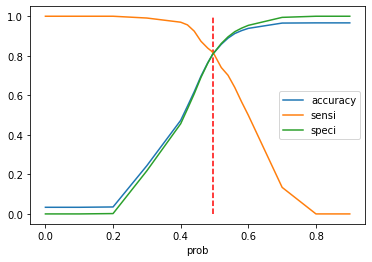

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.496, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [118]:
optimal_cut_off = 0.496
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.42  \
0      0    0.263307    1    1    1    0    0    0    0    0    0    0     0   
1      0    0.448884    1    1    1    1    1    0    0    0    0    0     1   
2      0    0.528187    1    1    1    1    1    1    0    0    0    0     1   
3      0    0.405399    1    1    1    1    1    0    0    0    0    0     0   
4      0    0.264646    1    1    1    0    0    0    0    0    0    0     0   

   0.44  0.46  0.48  0.49  0.491  0.492  0.494  0.496  0.498  0.52  0.54  \
0     0     0     0     0      0      0      0      0      0     0     0   
1     1     0     0     0      0      0      0      0      0     0     0   
2     1     1     1     1      1      1      1      1      1     1     0   
3     0     0     0     0      0      0      0      0      0     0     0   
4     0     0     0     0      0      0      0      0      0     0     0   

   0.56  0.58  predicted  
0     0     0          0  
1     0     0          0  
2     0     0          1  
3     0     0          0  
4     0     0          0

In [119]:
rou_auc_metric = roc_auc_score(y_train_pred_final.churn, y_train_pred_final.churn_prob)
accuracy_metric = accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)
recall_metric = recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)


temp = pd.Series(['Random Forest with PCA','Train',rou_auc_metric,accuracy_metric,recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676
2        Random Forest with PCA      Train  0.886814  0.810607  0.812971

In [120]:
y_test_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_test_pred_final['churn'] = y_test.values

In [121]:
pred_probs_test = rf_best.predict_proba(df_test_pca)

y_test_pred_final['churn_prob'] = pred_probs_test[:,1]
y_test_pred_final.head()

churn  churn_prob
0      0    0.290305
1      0    0.297558
2      0    0.402363
3      0    0.450659
4      0    0.319927

In [122]:
y_test_pred_final['predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_test_pred_final.head()

churn  churn_prob  predicted
0      0    0.290305          0
1      0    0.297558          0
2      0    0.402363          0
3      0    0.450659          0
4      0    0.319927          0

In [123]:
rou_auc_metric = roc_auc_score(y_test_pred_final.churn, y_test_pred_final.churn_prob)

accuracy_metric = accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)
recall_metric = recall_score(y_test_pred_final.churn, y_test_pred_final.predicted)

temp = pd.Series(['Random Forest with PCA','Test',rou_auc_metric,accuracy_metric, recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676
2        Random Forest with PCA      Train  0.886814  0.810607  0.812971
3        Random Forest with PCA       Test  0.874777  0.808092  0.820423

## Building Interpretable Model

### Model - 2a: Random Forest

In [124]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_data_final_2.drop(['churn'],axis=1)

# Putting response variable to y
y = churn_data_final_2['churn']

y.head()

3     0
6     0
8     0
17    0
21    0
Name: churn, dtype: int32

In [125]:
X.shape, y.shape

((28274, 178), (28274,))

In [126]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19791, 178), (8483, 178), (19791,), (8483,))

In [128]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.966449
 1    0.033551
 Name: churn, dtype: float64,
 0    0.966521
 1    0.033479
 Name: churn, dtype: float64)

#### Fit Model

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [130]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [5,10, 25, 50, 100]
}

In [131]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [132]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.0min finished


Wall time: 6min 1s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [5, 10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [133]:
grid_search.best_score_

0.9337349397590361

In [134]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=200, n_estimators=5, n_jobs=-1,
                       random_state=42)

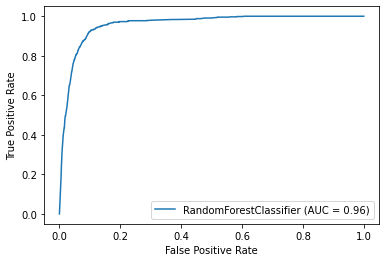

In [135]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [136]:
y_train_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_train_pred_final['churn'] = y_train.values

pred_probs_train = rf_best.predict_proba(X_train)

y_train_pred_final['churn_prob'] = pred_probs_train[:,1]
y_train_pred_final.head()

churn  churn_prob
0      0    0.216145
1      0    0.038866
2      0    0.316606
3      0    0.038866
4      0    0.068191

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
numbers.extend([0.55, 0.551, 0.552, 0.553, 0.554, 0.555])

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.55  \
0      0    0.216145    1    1    1    0    0    0    0    0    0    0     0   
1      0    0.038866    1    0    0    0    0    0    0    0    0    0     0   
2      0    0.316606    1    1    1    1    0    0    0    0    0    0     0   
3      0    0.038866    1    0    0    0    0    0    0    0    0    0     0   
4      0    0.068191    1    0    0    0    0    0    0    0    0    0     0   

   0.551  0.552  0.553  0.554  0.555  
0      0      0      0      0      0  
1      0      0      0      0      0  
2      0      0      0      0      0  
3      0      0      0      0      0  
4      0      0      0      0      0

In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df = cutoff_df.sort_index()
cutoff_df

prob  accuracy     sensi     speci
0.000  0.000  0.033551  1.000000  0.000000
0.100  0.100  0.419534  0.998494  0.399435
0.200  0.200  0.638523  0.983434  0.626549
0.300  0.300  0.792077  0.972892  0.785800
0.400  0.400  0.844020  0.960843  0.839964
0.500  0.500  0.889798  0.933735  0.888273
0.550  0.550  0.906372  0.912651  0.906154
0.551  0.551  0.906725  0.912651  0.906520
0.552  0.552  0.907938  0.905120  0.908036
0.553  0.553  0.907938  0.905120  0.908036
0.554  0.554  0.907938  0.905120  0.908036
0.555  0.555  0.910363  0.897590  0.910807
0.600  0.600  0.922086  0.870482  0.923877
0.700  0.700  0.952403  0.709337  0.960841
0.800  0.800  0.963670  0.498494  0.979819
0.900  0.900  0.966904  0.423193  0.985779

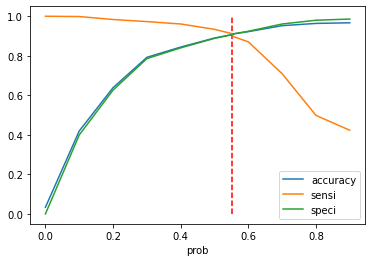

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.552, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [140]:
optimal_cut_off = 0.49
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.55  \
0      0    0.216145    1    1    1    0    0    0    0    0    0    0     0   
1      0    0.038866    1    0    0    0    0    0    0    0    0    0     0   
2      0    0.316606    1    1    1    1    0    0    0    0    0    0     0   
3      0    0.038866    1    0    0    0    0    0    0    0    0    0     0   
4      0    0.068191    1    0    0    0    0    0    0    0    0    0     0   

   0.551  0.552  0.553  0.554  0.555  predicted  
0      0      0      0      0      0          0  
1      0      0      0      0      0          0  
2      0      0      0      0      0          0  
3      0      0      0      0      0          0  
4      0      0      0      0      0          0

In [141]:
rou_auc_metric = roc_auc_score(y_train_pred_final.churn, y_train_pred_final.churn_prob)
accuracy_metric = accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)
recall_metric = recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)


temp = pd.Series(['Random Forest','Train',rou_auc_metric,accuracy_metric,recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676
2        Random Forest with PCA      Train  0.886814  0.810607  0.812971
3        Random Forest with PCA       Test  0.874777  0.808092  0.820423
4                 Random Forest      Train  0.958506  0.887727  0.933735

In [142]:
y_test_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_test_pred_final['churn'] = y_test.values

In [143]:
pred_probs_test = rf_best.predict_proba(X_test)

y_test_pred_final['churn_prob'] = pred_probs_test[:,1]
y_test_pred_final.head()

churn  churn_prob
0      0    0.310239
1      0    0.629730
2      0    0.038866
3      0    0.038866
4      0    0.343474

In [144]:
y_test_pred_final['predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_test_pred_final.head()

churn  churn_prob  predicted
0      0    0.310239          0
1      0    0.629730          1
2      0    0.038866          0
3      0    0.038866          0
4      0    0.343474          0

In [145]:
rou_auc_metric = roc_auc_score(y_test_pred_final.churn, y_test_pred_final.churn_prob)

accuracy_metric = accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)
recall_metric = recall_score(y_test_pred_final.churn, y_test_pred_final.predicted)

temp = pd.Series(['Random Forest','Test',rou_auc_metric,accuracy_metric, recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676
2        Random Forest with PCA      Train  0.886814  0.810607  0.812971
3        Random Forest with PCA       Test  0.874777  0.808092  0.820423
4                 Random Forest      Train  0.958506  0.887727  0.933735
5                 Random Forest       Test  0.964593  0.887304  0.919014

In [146]:
# Print Important variables to identify churn customers

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False).head(10)

Varname       Imp
17      roam_ic_mou_8  0.345451
68   loc_ic_t2m_mou_8  0.155898
74       loc_ic_mou_8  0.152527
92     total_ic_mou_8  0.133894
20      roam_og_mou_8  0.086551
49       std_og_mou_7  0.016897
37   std_og_t2t_mou_7  0.016451
107  total_rech_amt_8  0.016350
61     total_og_mou_7  0.014536
10        onnet_mou_7  0.012010

### Model 1b - Logistic Regression

#### Check Multicollinearity

In [147]:
# Get correlation matrix

corr_matrix = churn_data_final.corr()
corr_matrix

arpu_6    arpu_7    arpu_8  onnet_mou_6  \
arpu_6                             1.000000  0.717383  0.624047     0.471787   
arpu_7                             0.717383  1.000000  0.776354     0.334278   
arpu_8                             0.624047  0.776354  1.000000     0.264545   
onnet_mou_6                        0.471787  0.334278  0.264545     1.000000   
onnet_mou_7                        0.326239  0.451848  0.351417     0.758605   
onnet_mou_8                        0.281704  0.385558  0.477613     0.630572   
offnet_mou_6                       0.636408  0.473698  0.385177     0.093010   
offnet_mou_7                       0.438792  0.613128  0.481651     0.041843   
offnet_mou_8                       0.380100  0.503983  0.633391     0.040141   
roam_ic_mou_6                      0.142098  0.130601  0.128485     0.030859   
roam_ic_mou_7                      0.109143  0.114610  0.098802     0.036519   
roam_ic_mou_8                      0.125025  0.124530  0.129717     0.062101   
roam_og_mou_6                      0.240691  0.198372  0.194772     0.078261   
roam_og_mou_7                      0.199533  0.237729  0.193136     0.085742   
roam_og_mou_8                      0.173923  0.204342  0.249792     0.090535   
loc_og_t2t_mou_6                   0.231851  0.167765  0.151296     0.452387   
loc_og_t2t_mou_7                   0.191169  0.218360  0.183177     0.355032   
loc_og_t2t_mou_8                   0.188881  0.202136  0.241111     0.311977   
loc_og_t2m_mou_6                   0.452040  0.324992  0.300424     0.029851   
loc_og_t2m_mou_7                   0.367525  0.419228  0.362936     0.008221   
loc_og_t2m_mou_8                   0.341585  0.368122  0.454591     0.003928   
loc_og_t2f_mou_6                   0.212547  0.186968  0.176962     0.002659   
loc_og_t2f_mou_7                   0.180308  0.202891  0.180532    -0.004852   
loc_og_t2f_mou_8                   0.182327  0.196983  0.208970    -0.002924   
loc_og_t2c_mou_6                   0.039905  0.006464  0.004722     0.028532   
loc_og_t2c_mou_7                   0.001910  0.036751  0.022472     0.012498   
loc_og_t2c_mou_8                   0.001625  0.028831  0.050939     0.022660   
loc_og_mou_6                       0.449520  0.325174  0.298410     0.299763   
loc_og_mou_7                       0.365094  0.416540  0.356913     0.240904   
loc_og_mou_8                       0.345929  0.371935  0.452666     0.197768   
std_og_t2t_mou_6                   0.382989  0.266069  0.196087     0.866298   
std_og_t2t_mou_7                   0.247193  0.372099  0.280646     0.648086   
std_og_t2t_mou_8                   0.204230  0.310416  0.389080     0.533623   
std_og_t2m_mou_6                   0.415955  0.313924  0.226520     0.085285   
std_og_t2m_mou_7                   0.265936  0.427122  0.317487     0.038802   
std_og_t2m_mou_8                   0.215162  0.338192  0.431294     0.036056   
std_og_t2f_mou_6                   0.095187  0.080528  0.071900    -0.003982   
std_og_t2f_mou_7                   0.074930  0.089840  0.074619    -0.007470   
std_og_t2f_mou_8                   0.069174  0.076055  0.086254    -0.009457   
std_og_mou_6                       0.536290  0.389355  0.283903     0.641314   
std_og_mou_7                       0.346457  0.539308  0.403710     0.460394   
std_og_mou_8                       0.280841  0.433903  0.548654     0.382820   
isd_og_mou_6                       0.237039  0.182359  0.172474    -0.014084   
isd_og_mou_7                       0.172523  0.232781  0.192291    -0.016806   
isd_og_mou_8                       0.171257  0.197538  0.243660    -0.015843   
spl_og_mou_6                       0.085144  0.034521  0.025216     0.064945   
spl_og_mou_7                       0.021150  0.073021  0.040608     0.044367   
spl_og_mou_8                       0.025537  0.055831  0.090307     0.047960   
og_others_6                        0.053276  0.007551  0.002981     0.035528   
og_others_7                        0.

In [148]:
# Transform correaltion matrix into tabular form

corr_abs = corr_matrix.abs()

toal_corr = corr_abs.sum()-1

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[0]):
        if i<=j:
            corr_abs.iloc[i,j] = np.NaN
            
corr_pair = corr_abs.unstack().reset_index()
corr_pair.dropna(subset=[0], inplace=True)
corr_pair.head()

level_0      level_1         0
1  arpu_6       arpu_7  0.717383
2  arpu_6       arpu_8  0.624047
3  arpu_6  onnet_mou_6  0.471787
4  arpu_6  onnet_mou_7  0.326239
5  arpu_6  onnet_mou_8  0.281704

In [149]:
# Sum all correlations of a columns with the rest and this will help as total correlation score of that column

corr_pair['total_corr_0'] = corr_pair['level_0'].map(lambda x:toal_corr.loc[x])
corr_pair['total_corr_1'] = corr_pair['level_1'].map(lambda x:toal_corr.loc[x])
corr_pair.head()

level_0      level_1         0  total_corr_0  total_corr_1
1  arpu_6       arpu_7  0.717383     33.790664     35.715666
2  arpu_6       arpu_8  0.624047     33.790664     34.604422
3  arpu_6  onnet_mou_6  0.471787     33.790664     17.855725
4  arpu_6  onnet_mou_7  0.326239     33.790664     19.351544
5  arpu_6  onnet_mou_8  0.281704     33.790664     18.633951

In [150]:
# Identify column with high correlation score etween the correlation pair

corr_pair['high_corr'] = np.where(corr_pair['total_corr_0']>corr_pair['total_corr_1'],corr_pair['level_0'],corr_pair['level_1'])
corr_pair.head()

level_0      level_1         0  total_corr_0  total_corr_1 high_corr
1  arpu_6       arpu_7  0.717383     33.790664     35.715666    arpu_7
2  arpu_6       arpu_8  0.624047     33.790664     34.604422    arpu_8
3  arpu_6  onnet_mou_6  0.471787     33.790664     17.855725    arpu_6
4  arpu_6  onnet_mou_7  0.326239     33.790664     19.351544    arpu_6
5  arpu_6  onnet_mou_8  0.281704     33.790664     18.633951    arpu_6

In [151]:
# Identify pairs with more than 0.8 correlation and select the one with high correaltion score

high_corr_cols = set(corr_pair[corr_pair[0]>=0.8]['high_corr'])
high_corr_cols

{'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'av_rech_amt_7',
 'av_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'isd_og_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'std_og_mou_7',
 'std_og_t2t_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'vol_3g_mb_7'}

In [152]:
# Drop those high correlated columns identified above

churn_data_final.drop(columns=high_corr_cols, inplace=True)

In [153]:
churn_data_final.shape

(28257, 114)

#### Splitting train test

In [154]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_data_final.drop(['churn'],axis=1)

# Putting response variable to y
y = churn_data_final['churn']

y.head()

3     0
6     0
8     0
17    0
21    0
Name: churn, dtype: int32

In [155]:
X.shape, y.shape

((28257, 113), (28257,))

In [156]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

In [157]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19779, 113), (8478, 113), (19779,), (8478,))

In [158]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.96648
 1    0.03352
 Name: churn, dtype: float64,
 0    0.966502
 1    0.033498
 Name: churn, dtype: float64)

#### Scaling

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
cat_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6', 'fb_user_7', 'fb_user_8']
num_columns = [ x for x in list(X_train.columns) if x not in cat_columns]
len(num_columns)

107

In [161]:
scaler = StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_train.head()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
72077      -0.185901      -0.134818      -0.140703      -0.207182   
21300      -0.185901      -0.134818      -0.140703      -0.207182   
78227      -0.185901      -0.134818      -0.140703      -0.207182   
40227      -0.185901      -0.134818      -0.140703      -0.207182   
60279      -0.185901      -0.134818       0.230082      -0.207182   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
72077       -0.17948      -0.162111         -0.164616         -0.093600   
21300       -0.17948      -0.162111         -0.175118         -0.135441   
78227       -0.03932      -0.162111         -0.325944         -0.307604   
40227       -0.17948      -0.162111         -0.326586         -0.285828   
60279       -0.17948       0.024897         -0.183876         -0.243486   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
72077          0.012986          0.095701         -0.246993         -0.230109   
21300         -0.542445         -0.576011         -0.246993         -0.230109   
78227         -0.568589         -0.527016         -0.246993         -0.230109   
40227         -0.558874         -0.569246         -0.246993         -0.230109   
60279         -0.387965         -0.423222         -0.210336         -0.230109   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
72077         -0.216439         -0.214560         -0.228184     -0.104668   
21300          1.414445          1.347613          2.181897     -0.472868   
78227         -0.216439          1.073758          1.316936     -0.584493   
40227         -0.173677          0.213213          1.801358     -0.578540   
60279         -0.198621         -0.191572         -0.228184     -0.376311   

       std_og_t2t_mou_6  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
72077         -0.423205         -0.410238         -0.436377         -0.444850   
21300          2.456054          4.633692         -0.165321         -0.318937   
78227         -0.416684         -0.310559         -0.239780         -0.365687   
40227          0.066805          0.028840         -0.097094         -0.115742   
60279         -0.154843         -0.292691         -0.360491         -0.370820   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
72077         -0.413661         -0.110726         -0.037590          0.915992   
21300         -0.199023         -0.110726         -0.107492         -0.107445   
78227          0.169171         -0.110726         -0.107492         -0.107445   
40227         -0.011089         -0.110726         -0.107492         -0.107445   
60279         -0.348252         -0.110726         -0.107492         -0.107445   

       std_og_mou_6  std_og_mou_8  isd_og_mou_6  isd_og_mou_8  spl_og_mou_6  \
72077     -0.577030     -0.539805     -0.074884     -0.068169     -0.281184   
21300      1.564488      2.993070     -0.074884     -0.068169      4.440763   
78227     -0.443297     -0.098767     -0.074884     -0.068169     -0.150224   
40227     -0.019815      0.010853     -0.074884     -0.068169     -0.299468   
60279     -0.344126     -0.429316     -0.074884     -0.068169     -0.296009   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
72077     -0.321304     -0.256587     0.174725    -0.013376    -0.014329   
21300      7.020906      9.338538     1.083944    -0.013376    -0.014329   
78227      2.102120      0.656758    -0.181673    -0.013376    -0.014329   
40227      0.013628      0.536981    -0.181673    -0.013376    -0.014329   
60279     -0.324011     -0.305907    -0.181673    -0.013376    -0.014329   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_8  \
72077          0.401457          1.120070          1.255535          1.518761   
21300         -0.205406         -0.181032         -0.598444         -0.631219   
78227         -0.329069         -0.336763 

In [162]:
X_test[num_columns] = scaler.transform(X_test[num_columns])
X_test.head()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
68928      -0.185901      -0.134818      -0.140703      -0.207182   
56731      -0.185901      -0.059876       0.912947      -0.207182   
44093      -0.185901      -0.134818      -0.140703      -0.207182   
20690      -0.185901      -0.134818      -0.140703      -0.207182   
82584      -0.185901      -0.134818      -0.140703      -0.207182   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
68928      -0.179480      -0.162111          0.121123          0.016615   
56731      -0.134023       0.664434          0.703745          0.141680   
44093      -0.179480      -0.162111         -0.285864         -0.307896   
20690      -0.179480      -0.162111         -0.296870         -0.229928   
82584      -0.179480      -0.162111         -0.254268         -0.250244   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
68928         -0.270493         -0.354438          0.366118         -0.230109   
56731         -0.099364         -0.152883         -0.246993         -0.187635   
44093         -0.492321         -0.507135         -0.246993         -0.230109   
20690         -0.534408         -0.555992         -0.246993         -0.177833   
82584         -0.367871         -0.495663         -0.169366         -0.230109   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
68928         -0.216439         -0.214560         -0.228184     -0.085489   
56731         -0.216439         -0.074634         -0.228184      0.366702   
44093          2.483487         -0.214560         -0.228184     -0.509674   
20690         -0.216439         -0.214560         -0.228184     -0.543978   
82584         -0.216439         -0.214560         -0.228184     -0.405727   

       std_og_t2t_mou_6  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
68928         -0.423205         -0.410238         -0.420317         -0.421716   
56731         -0.224430         -0.370938         -0.327870         -0.157311   
44093          4.660180          4.108759         -0.281250         -0.273874   
20690         -0.062460          0.281349         -0.366909         -0.364748   
82584         -0.423205         -0.410238         -0.070417         -0.133044   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
68928         -0.381652         -0.110726         -0.107492         -0.107445   
56731         -0.257994         -0.110726         -0.107492         -0.107445   
44093          0.015564         -0.110726         -0.107492         -0.107445   
20690         -0.358244         -0.110726         -0.107492         -0.085853   
82584          0.041830          0.026145         -0.107492         -0.107445   

       std_og_mou_6  std_og_mou_8  isd_og_mou_6  isd_og_mou_8  spl_og_mou_6  \
68928     -0.566470     -0.530751     -0.074884     -0.068169     -0.317259   
56731     -0.370126     -0.422359     -0.074884      0.322440     -0.317259   
44093      2.991211      2.781025     -0.074884     -0.068169      1.687159   
20690     -0.285370     -0.048399     -0.074884     -0.068169      0.514950   
82584     -0.334522     -0.250350     -0.074884     -0.068169     -0.317259   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
68928     -0.332907      0.261457    -0.181673    -0.013376    -0.014329   
56731     -0.278760     -0.305907    -0.181673    -0.013376    -0.014329   
44093     -0.164667     -0.239529    -0.181673    -0.013376    -0.014329   
20690     -0.332907     -0.305907    -0.181673    -0.013376    -0.014329   
82584      0.203140     -0.295524    -0.181673    -0.013376    -0.014329   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_8  \
68928          0.365883         -0.042217         -0.208608         -0.325459   
56731          0.181503          0.136610          0.085790         -0.106921   
44093         -0.294400         -0.357339 

In [163]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

In [164]:
factor = np.floor(y_train.value_counts()[0]/y_train.value_counts()[1])
weight = np.where(y_train==1, factor, 1)

In [165]:
print(y_train.value_counts())
pd.Series(weight).value_counts()

0    19116
1      663
Name: churn, dtype: int64


1.0     19116
28.0      663
dtype: int64

In [166]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(), freq_weights=weight)
logm1 = logm1.fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19779
Model:                            GLM   Df Residuals:                    37566
Model Family:                Binomial   Df Model:                          113
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 03 Dec 2021   Deviance:                          nan
Time:                        23:27:57   Pearson chi2:                 1.41e+09
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -97.4377   8400.942     -0.012      0.991   -1.66e+04    1.64e+04
roam_ic_mou_6                         0.1076      0.020      5.255      0.000       0.067       0.148
roam_ic_mou_7                         0.0294      0.033      0.881      0.378      -0.036       0.095
roam_ic_mou_8                         0.2510      0.031      8.107      0.000       0.190       0.312
roam_og_mou_6                        -0.0481      0.022     -2.144      0.032      -0.092      -0.004
roam_og_mou_7                        -0.0013      0.024     -0.052      0.959      -0.049       0.046
roam_og_mou_8                         0.5259      0.030     17.259      0.000       0.466       0.586
loc_og_t2t_mou_6                  -2414.7364    612.290     -3.944      0.000   -3614.802   -1214.671
loc_og_t2t_mou_7                     -0.6442      0.088     -7.361      0.000      -0.816      -0.473
loc_og_t2m_mou_6                  -2507.8463    635.795     -3.944      0.000   -3753.982   -1261.710
loc_og_t2m_mou_7                     -0.3871      0.055     -7.018      0.000      -0.495      -0.279
loc_og_t2f_mou_6                   -154.1203     39.074     -3.944      0.000    -230.703     -77.537
loc_og_t2f_mou_7                     -0.3414      0.081     -4.216      0.000      -0.500      -0.183
loc_og_t2c_mou_6                      0.1174      0.023      5.195      0.000       0.073       0.162
loc_og_t2c_mou_7                     -0.1268      0.031     -4.034      0.000      -0.188      -0.065
loc_og_t2c_mou_8                      0.1682      0.029      5.774      0.000       0.111       0.225
loc_og_mou_6                       3851.0460    976.484      3.944      0.000    1937.173    5764.919
std_og_t2t_mou_6                   -1.24e+04   1232.437    -10.065      0.000   -1.48e+04   -9988.757
std_og_t2t_mou_8                   4606.5522   1386.022      3.324      0.001    1889.999    7323.105
std_og_t2m_mou_6                  -1.196e+04   1188.455    -10.065      0.000   -1.43e+04   -9632.373
std_og_t2m_mou_7                      0.2184      0.036      6.078      0.000       0.148       0.289
std_og_t2m_mou_8                   4520.9524   1360.305      3.323      0.001    1854.803    7187.102
std_og_t2f_mou_6                   -249.4049     24.774    -10.067      0.000    -297.961    -200.849
std_og_t2f_mou_7                     -0.0283      0.058     -0.488      0.626      -0.142       0.085
std_og_t2f_mou_8                     80.0814     24.347      3.289      0.001      32.362     127.801
std_og_mou_6                       1.819e+04   1807.429     10.065      0.000    1.46e+04    2.17e+04
std_og_mou_8                      -6828.0689   2054.425     -3.324      0.001   -1.09e+04   -2801.471
isd_og_mou_6           

In [167]:
roc_auc_score(y_train.values, logm1.predict(X_train_sm).values.reshape(-1))

0.917458924271819

In [168]:
roc_auc_score(y_test.values, logm1.predict(sm.add_constant(X_test)).values.reshape(-1))

0.9016147163675242

#### Feature Selection Using RFE

In [169]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [170]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 50) 
rfe = rfe.fit(X_train, y_train)

In [171]:
rfe_df = pd.DataFrame()
rfe_df['column'] = X_train.columns
rfe_df['rank'] = rfe.ranking_
rfe_df.sort_values('rank')

column  rank
56                         ic_others_7     1
32                         og_others_7     1
67                 date_of_last_rech_6     1
93                        monthly_3g_6     1
35                    loc_ic_t2t_mou_8     1
37                    loc_ic_t2m_mou_8     1
90                         sachet_2g_6     1
39                    loc_ic_t2f_mou_7     1
89                        monthly_2g_8     1
41                    std_ic_t2t_mou_7     1
42                    std_ic_t2t_mou_8     1
86                    night_pck_user_8     1
31                         og_others_6     1
46                    std_ic_t2f_mou_6     1
84                    night_pck_user_6     1
83                         vol_3g_mb_8     1
81                         vol_2g_mb_8     1
51                        spl_ic_mou_8     1
111  data_other_total_rech_amt_ratio_7     1
57                         ic_others_8     1
60                    total_rech_num_8     1
72                  last_day_rch_amt_8     1
62                    total_rech_amt_7     1
69                 date_of_last_rech_8     1
64                      max_rech_amt_6     1
85                    night_pck_user_7     1
30                        spl_og_mou_8     1
33                         og_others_8     1
66                      max_rech_amt_8     1
7                     loc_og_t2t_mou_7     1
102                                aon     1
108                      og_ic_ratio_8     1
8                     loc_og_t2m_mou_6     1
9                     loc_og_t2m_mou_7     1
101                          fb_user_8     1
11                    loc_og_t2f_mou_7     1
27                        isd_og_mou_8     1
2                        roam_ic_mou_8     1
14                    loc_og_t2c_mou_8     1
16                    std_og_t2t_mou_6     1
110  data_other_total_rech_amt_ratio_6     1
18                    std_og_t2m_mou_6     1
26                        isd_og_mou_6     1
97                         sachet_3g_7     1
100                          fb_user_7     1
99                           fb_user_6     1
23                    std_og_t2f_mou_8     1
20                    std_og_t2m_mou_8     1
19                    std_og_t2m_mou_7     1
5                        roam_og_mou_8     1
76                     max_rech_data_6     2
75            date_of_last_rech_data_8     3
98                         sachet_3g_8     4
22                    std_og_t2f_mou_7     5
15                        loc_og_mou_6     6
6                     loc_og_t2t_mou_6     7
96                         sachet_3g_6     8
36                    loc_ic_t2m_mou_6     9
78                     max_rech_data_8    10
77                     max_rech_data_7    11
13                    loc_og_t2c_mou_7    12
12                    loc_og_t2c_mou_6    13
28                        spl_og_mou_6    14
80                         vol_2g_mb_7    15
79                         vol_2g_mb_6    16
45                    std_ic_t2m_mou_8    17
44                    std_ic_t2m_mou_7    18
0                        roam_ic_mou_6    19
112  data_other_total_rech_amt_ratio_8    20
92                         sachet_2g_8    21
59                    total_rech_num_7    22
106                      og_ic_ratio_6    23
55                         ic_others_6    24
74            date_of_last_rech_data_7    25
103                         aug_vbc_3g    26
54                        isd_ic_mou_8    27
34                    loc_ic_t2t_mou_6    28
63                    total_rech_amt_8    29
65                      max_rech_amt_7    30
109                      av_rech_amt_6    31
3                        roam_og_mou_6    32
107                      og_ic_ratio_7    33
91                         sachet_2g_7    34
24                        std_og_mou_6    35
48                    std_ic_t2f_mou_8    36
47                    std_ic_t2f_mou_7    37
21                    std_og_t2f_mou_6    38
50                        spl_ic_mou_7    39
43                    std_i

In [172]:
rfe_col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

In [173]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial(), freq_weights=weight)
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19779
Model:                            GLM   Df Residuals:                    37629
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 03 Dec 2021   Deviance:                          nan
Time:                        23:28:41   Pearson chi2:                 3.01e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -98.2266   8401.433     -0.012      0.991   -1.66e+04    1.64e+04
roam_ic_mou_8                         0.3056      0.026     11.620      0.000       0.254       0.357
roam_og_mou_8                         0.5257      0.025     21.222      0.000       0.477       0.574
loc_og_t2t_mou_7                     -0.5590      0.071     -7.853      0.000      -0.699      -0.419
loc_og_t2m_mou_6                     -0.3306      0.043     -7.661      0.000      -0.415      -0.246
loc_og_t2m_mou_7                     -0.3158      0.049     -6.400      0.000      -0.413      -0.219
loc_og_t2f_mou_7                     -0.3974      0.057     -6.978      0.000      -0.509      -0.286
loc_og_t2c_mou_8                      0.1418      0.025      5.653      0.000       0.093       0.191
std_og_t2t_mou_6                      0.2380      0.016     14.569      0.000       0.206       0.270
std_og_t2m_mou_6                      0.1429      0.020      7.323      0.000       0.105       0.181
std_og_t2m_mou_7                      0.2380      0.033      7.261      0.000       0.174       0.302
std_og_t2m_mou_8                     -0.1607      0.029     -5.553      0.000      -0.217      -0.104
std_og_t2f_mou_8                     -0.9274      0.132     -7.006      0.000      -1.187      -0.668
isd_og_mou_6                          0.2420      0.034      7.055      0.000       0.175       0.309
isd_og_mou_8                         -0.5716      0.071     -8.074      0.000      -0.710      -0.433
spl_og_mou_8                         -0.3350      0.047     -7.117      0.000      -0.427      -0.243
og_others_6                          -0.1466      0.034     -4.322      0.000      -0.213      -0.080
og_others_7                       -1082.9732    4.8e+05     -0.002      0.998   -9.43e+05    9.41e+05
og_others_8                       -5711.9469   4.85e+05     -0.012      0.991   -9.55e+05    9.44e+05
loc_ic_t2t_mou_8                     -1.0622      0.091    -11.643      0.000      -1.241      -0.883
loc_ic_t2m_mou_8                     -0.9303      0.057    -16.218      0.000      -1.043      -0.818
loc_ic_t2f_mou_7                     -0.5969      0.055    -10.870      0.000      -0.705      -0.489
std_ic_t2t_mou_7                      0.3112      0.036      8.544      0.000       0.240       0.383
std_ic_t2t_mou_8                     -0.3669      0.044     -8.416      0.000      -0.452      -0.281
std_ic_t2f_mou_6                     -0.2023      0.052     -3.928      0.000      -0.303      -0.101
spl_ic_mou_8                         -0.7047      0.037    -19.094      0.000      -0.777      -0.632
ic_others_7                          -0.1680      0.060     -2.797      0.005      -0.286      -0.050
ic_others_8            

In [174]:
roc_auc_score(y_train.values, res.predict(X_train_sm).values.reshape(-1))

0.9150838873061095

In [175]:
roc_auc_score(y_test.values, res.predict(sm.add_constant(X_test[rfe_col])).values.reshape(-1))

0.9042037801620559

#### Checking VIFs

In [176]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = np.around(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                    std_og_t2m_mou_7  4.54
44                          fb_user_7  4.07
45                          fb_user_8  3.83
43                          fb_user_6  3.76
48  data_other_total_rech_amt_ratio_6  3.35
28                   total_rech_amt_7  3.17
4                    loc_og_t2m_mou_7  3.14
30                     max_rech_amt_8  3.07
10                   std_og_t2m_mou_8  3.04
40                        sachet_2g_6  3.00
3                    loc_og_t2m_mou_6  2.73
25                        ic_others_7  2.57
26                        ic_others_8  2.56
13                       isd_og_mou_8  2.50
12                       isd_og_mou_6  2.44
8                    std_og_t2m_mou_6  2.34
29                     max_rech_amt_6  2.32
49  data_other_total_rech_amt_ratio_7  2.15
21                   std_ic_t2t_mou_7  2.07
22                   std_ic_t2t_mou_8  2.07
33                 last_day_rch_amt_8  1.91
35                        vol_3g_mb_8  1.76
37                   night_pck_user_7  1.74
38                   night_pck_user_8  1.64
41                       monthly_3g_6  1.57
27                   total_rech_num_8  1.50
36                   night_pck_user_6  1.47
1                       roam_og_mou_8  1.43
14                       spl_og_mou_8  1.39
6                    loc_og_t2c_mou_8  1.36
34                        vol_2g_mb_8  1.32
7                    std_og_t2t_mou_6  1.32
0                       roam_ic_mou_8  1.31
19                   loc_ic_t2m_mou_8  1.30
39                       monthly_2g_8  1.30
42                        sachet_3g_7  1.29
5                    loc_og_t2f_mou_7  1.22
32                date_of_last_rech_8  1.18
2                    loc_og_t2t_mou_7  1.18
20                   loc_ic_t2f_mou_7  1.16
18                   loc_ic_t2t_mou_8  1.13
46                                aon  1.10
17                        og_others_8  1.07
16                        og_others_7  1.05
31                date_of_last_rech_6  1.05
11                   std_og_t2f_mou_8  1.03
23                   std_ic_t2f_mou_6  1.03
47                      og_ic_ratio_8  1.03
15                        og_others_6  1.02
24                       spl_ic_mou_8  1.02

In [178]:
rfe_col = rfe_col.drop('og_others_7', 1)
rfe_col.shape

(49,)

In [179]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial(), freq_weights=weight)
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19779
Model:                            GLM   Df Residuals:                    37630
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 03 Dec 2021   Deviance:                          nan
Time:                        23:28:52   Pearson chi2:                 2.85e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -83.8788   6787.250     -0.012      0.990   -1.34e+04    1.32e+04
roam_ic_mou_8                         0.3050      0.026     11.643      0.000       0.254       0.356
roam_og_mou_8                         0.5230      0.025     21.240      0.000       0.475       0.571
loc_og_t2t_mou_7                     -0.5616      0.071     -7.896      0.000      -0.701      -0.422
loc_og_t2m_mou_6                     -0.3283      0.043     -7.615      0.000      -0.413      -0.244
loc_og_t2m_mou_7                     -0.3196      0.049     -6.479      0.000      -0.416      -0.223
loc_og_t2f_mou_7                     -0.3977      0.057     -6.984      0.000      -0.509      -0.286
loc_og_t2c_mou_8                      0.1430      0.025      5.701      0.000       0.094       0.192
std_og_t2t_mou_6                      0.2366      0.016     14.516      0.000       0.205       0.269
std_og_t2m_mou_6                      0.1439      0.019      7.385      0.000       0.106       0.182
std_og_t2m_mou_7                      0.2337      0.033      7.166      0.000       0.170       0.298
std_og_t2m_mou_8                     -0.1578      0.029     -5.472      0.000      -0.214      -0.101
std_og_t2f_mou_8                     -0.9243      0.132     -6.994      0.000      -1.183      -0.665
isd_og_mou_6                          0.2413      0.034      7.033      0.000       0.174       0.309
isd_og_mou_8                         -0.5699      0.071     -8.065      0.000      -0.708      -0.431
spl_og_mou_8                         -0.3387      0.047     -7.188      0.000      -0.431      -0.246
og_others_6                          -0.1473      0.034     -4.347      0.000      -0.214      -0.081
og_others_8                       -5721.3397   4.74e+05     -0.012      0.990   -9.34e+05    9.23e+05
loc_ic_t2t_mou_8                     -1.0607      0.091    -11.630      0.000      -1.239      -0.882
loc_ic_t2m_mou_8                     -0.9330      0.057    -16.261      0.000      -1.045      -0.821
loc_ic_t2f_mou_7                     -0.5978      0.055    -10.895      0.000      -0.705      -0.490
std_ic_t2t_mou_7                      0.3127      0.036      8.597      0.000       0.241       0.384
std_ic_t2t_mou_8                     -0.3692      0.043     -8.495      0.000      -0.454      -0.284
std_ic_t2f_mou_6                     -0.2019      0.051     -3.922      0.000      -0.303      -0.101
spl_ic_mou_8                         -0.7057      0.037    -19.123      0.000      -0.778      -0.633
ic_others_7                          -0.1665      0.060     -2.782      0.005      -0.284      -0.049
ic_others_8                          -0.5108      0.102     -5.010      0.000      -0.711      -0.311
total_rech_num_8       

In [180]:
roc_auc_score(y_train.values, res.predict(X_train_sm).values.reshape(-1))

0.9147857945631291

In [181]:
roc_auc_score(y_test.values, res.predict(sm.add_constant(X_test[rfe_col])).values.reshape(-1))

0.9073974601821326

In [182]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = np.around(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                    std_og_t2m_mou_7  4.54
43                          fb_user_7  4.07
44                          fb_user_8  3.83
42                          fb_user_6  3.76
47  data_other_total_rech_amt_ratio_6  3.35
27                   total_rech_amt_7  3.17
4                    loc_og_t2m_mou_7  3.14
29                     max_rech_amt_8  3.06
10                   std_og_t2m_mou_8  3.04
39                        sachet_2g_6  3.00
3                    loc_og_t2m_mou_6  2.73
24                        ic_others_7  2.57
25                        ic_others_8  2.56
13                       isd_og_mou_8  2.50
12                       isd_og_mou_6  2.44
8                    std_og_t2m_mou_6  2.34
28                     max_rech_amt_6  2.32
48  data_other_total_rech_amt_ratio_7  2.15
20                   std_ic_t2t_mou_7  2.07
21                   std_ic_t2t_mou_8  2.07
32                 last_day_rch_amt_8  1.91
34                        vol_3g_mb_8  1.76
36                   night_pck_user_7  1.74
37                   night_pck_user_8  1.64
40                       monthly_3g_6  1.57
26                   total_rech_num_8  1.50
35                   night_pck_user_6  1.47
1                       roam_og_mou_8  1.43
14                       spl_og_mou_8  1.39
6                    loc_og_t2c_mou_8  1.36
33                        vol_2g_mb_8  1.32
7                    std_og_t2t_mou_6  1.32
0                       roam_ic_mou_8  1.31
38                       monthly_2g_8  1.30
18                   loc_ic_t2m_mou_8  1.30
41                        sachet_3g_7  1.29
5                    loc_og_t2f_mou_7  1.22
31                date_of_last_rech_8  1.18
2                    loc_og_t2t_mou_7  1.18
19                   loc_ic_t2f_mou_7  1.16
17                   loc_ic_t2t_mou_8  1.13
45                                aon  1.10
30                date_of_last_rech_6  1.05
11                   std_og_t2f_mou_8  1.03
22                   std_ic_t2f_mou_6  1.03
46                      og_ic_ratio_8  1.03
15                        og_others_6  1.02
16                        og_others_8  1.02
23                       spl_ic_mou_8  1.02

In [183]:
rfe_col = rfe_col.drop('og_others_8', 1)
rfe_col.shape

(48,)

In [184]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(), freq_weights=weight)
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19779
Model:                            GLM   Df Residuals:                    37631
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14635.
Date:                Fri, 03 Dec 2021   Deviance:                       29270.
Time:                        23:28:59   Pearson chi2:                 1.92e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.9111      0.041    -46.619      0.000      -1.991      -1.831
roam_ic_mou_8                         0.2955      0.026     11.378      0.000       0.245       0.346
roam_og_mou_8                         0.5247      0.025     21.233      0.000       0.476       0.573
loc_og_t2t_mou_7                     -0.5589      0.071     -7.879      0.000      -0.698      -0.420
loc_og_t2m_mou_6                     -0.3265      0.043     -7.588      0.000      -0.411      -0.242
loc_og_t2m_mou_7                     -0.3188      0.049     -6.473      0.000      -0.415      -0.222
loc_og_t2f_mou_7                     -0.3940      0.057     -6.929      0.000      -0.506      -0.283
loc_og_t2c_mou_8                      0.1470      0.025      5.858      0.000       0.098       0.196
std_og_t2t_mou_6                      0.2380      0.016     14.617      0.000       0.206       0.270
std_og_t2m_mou_6                      0.1416      0.019      7.290      0.000       0.104       0.180
std_og_t2m_mou_7                      0.2331      0.033      7.159      0.000       0.169       0.297
std_og_t2m_mou_8                     -0.1573      0.029     -5.456      0.000      -0.214      -0.101
std_og_t2f_mou_8                     -1.0156      0.136     -7.454      0.000      -1.283      -0.749
isd_og_mou_6                          0.2458      0.034      7.161      0.000       0.179       0.313
isd_og_mou_8                         -0.5776      0.070     -8.215      0.000      -0.715      -0.440
spl_og_mou_8                         -0.3564      0.047     -7.553      0.000      -0.449      -0.264
og_others_6                          -0.1488      0.034     -4.409      0.000      -0.215      -0.083
loc_ic_t2t_mou_8                     -1.0674      0.091    -11.702      0.000      -1.246      -0.889
loc_ic_t2m_mou_8                     -0.9315      0.057    -16.253      0.000      -1.044      -0.819
loc_ic_t2f_mou_7                     -0.5957      0.055    -10.882      0.000      -0.703      -0.488
std_ic_t2t_mou_7                      0.3099      0.036      8.540      0.000       0.239       0.381
std_ic_t2t_mou_8                     -0.3674      0.043     -8.462      0.000      -0.452      -0.282
std_ic_t2f_mou_6                     -0.2001      0.051     -3.896      0.000      -0.301      -0.099
spl_ic_mou_8                         -0.7062      0.037    -19.166      0.000      -0.778      -0.634
ic_others_7                          -0.1687      0.060     -2.814      0.005      -0.286      -0.051
ic_others_8                          -0.5095      0.102     -4.997      0.000      -0.709      -0.310
total_rech_num_8                     -0.3733      0.022    -17.190      0.000      -0.416      -0.331
total_rech_amt_7       

In [185]:
roc_auc_score(y_train.values, res.predict(X_train_sm).values.reshape(-1))

0.9143005456564779

In [186]:
roc_auc_score(y_test.values, res.predict(sm.add_constant(X_test[rfe_col])).values.reshape(-1))

0.9070364952713598

In [187]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = np.around(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                    std_og_t2m_mou_7  4.54
42                          fb_user_7  4.07
43                          fb_user_8  3.83
41                          fb_user_6  3.76
46  data_other_total_rech_amt_ratio_6  3.35
26                   total_rech_amt_7  3.17
4                    loc_og_t2m_mou_7  3.14
28                     max_rech_amt_8  3.06
10                   std_og_t2m_mou_8  3.04
38                        sachet_2g_6  3.00
3                    loc_og_t2m_mou_6  2.73
24                        ic_others_8  2.56
23                        ic_others_7  2.56
13                       isd_og_mou_8  2.50
12                       isd_og_mou_6  2.44
8                    std_og_t2m_mou_6  2.34
27                     max_rech_amt_6  2.32
47  data_other_total_rech_amt_ratio_7  2.15
20                   std_ic_t2t_mou_8  2.07
19                   std_ic_t2t_mou_7  2.07
31                 last_day_rch_amt_8  1.91
33                        vol_3g_mb_8  1.76
35                   night_pck_user_7  1.74
36                   night_pck_user_8  1.64
39                       monthly_3g_6  1.57
25                   total_rech_num_8  1.50
34                   night_pck_user_6  1.47
1                       roam_og_mou_8  1.43
14                       spl_og_mou_8  1.39
6                    loc_og_t2c_mou_8  1.36
32                        vol_2g_mb_8  1.32
7                    std_og_t2t_mou_6  1.32
0                       roam_ic_mou_8  1.31
37                       monthly_2g_8  1.30
17                   loc_ic_t2m_mou_8  1.30
40                        sachet_3g_7  1.29
5                    loc_og_t2f_mou_7  1.22
30                date_of_last_rech_8  1.18
2                    loc_og_t2t_mou_7  1.18
18                   loc_ic_t2f_mou_7  1.16
16                   loc_ic_t2t_mou_8  1.13
44                                aon  1.10
29                date_of_last_rech_6  1.05
11                   std_og_t2f_mou_8  1.03
21                   std_ic_t2f_mou_6  1.03
45                      og_ic_ratio_8  1.03
22                       spl_ic_mou_8  1.02
15                        og_others_6  1.01

#### Finding Optimal Cutoff Point

In [188]:
y_train_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_train_pred_final['churn'] = y_train.values

In [189]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

y_train_pred_final['churn_prob'] = y_train_pred.values.reshape(-1)
y_train_pred_final.head()

churn  churn_prob
0      0    0.005686
1      0    0.048112
2      0    0.174833
3      0    0.090887
4      0    0.113030

In [190]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
numbers.extend([0.42, 0.44, 0.46, 0.48, 0.505, 0.51, 0.52, 0.54, 0.56, 0.58])

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.42  \
0      0    0.005686    1    0    0    0    0    0    0    0    0    0     0   
1      0    0.048112    1    0    0    0    0    0    0    0    0    0     0   
2      0    0.174833    1    1    0    0    0    0    0    0    0    0     0   
3      0    0.090887    1    0    0    0    0    0    0    0    0    0     0   
4      0    0.113030    1    1    0    0    0    0    0    0    0    0     0   

   0.44  0.46  0.48  0.505  0.51  0.52  0.54  0.56  0.58  
0     0     0     0      0     0     0     0     0     0  
1     0     0     0      0     0     0     0     0     0  
2     0     0     0      0     0     0     0     0     0  
3     0     0     0      0     0     0     0     0     0  
4     0     0     0      0     0     0     0     0     0

In [191]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df = cutoff_df.sort_index()
cutoff_df

prob  accuracy     sensi     speci
0.000  0.000  0.033520  1.000000  0.000000
0.100  0.100  0.446079  0.983409  0.427443
0.200  0.200  0.586885  0.962293  0.573865
0.300  0.300  0.687193  0.938160  0.678489
0.400  0.400  0.773244  0.906486  0.768623
0.420  0.420  0.787654  0.900452  0.783741
0.440  0.440  0.800293  0.889894  0.797186
0.460  0.460  0.813287  0.874811  0.811153
0.480  0.480  0.826382  0.859729  0.825225
0.500  0.500  0.838364  0.847662  0.838041
0.505  0.505  0.840538  0.843137  0.840448
0.510  0.510  0.843673  0.840121  0.843796
0.520  0.520  0.849537  0.832579  0.850126
0.540  0.540  0.860104  0.820513  0.861477
0.560  0.560  0.870266  0.811463  0.872306
0.580  0.580  0.879721  0.803922  0.882350
0.600  0.600  0.887760  0.793363  0.891034
0.700  0.700  0.921230  0.719457  0.928228
0.800  0.800  0.943374  0.574661  0.956162
0.900  0.900  0.955458  0.301659  0.978134

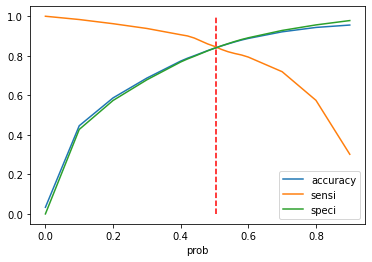

In [192]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.505, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [193]:
optimal_cut_off = 0.505
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_train_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.42  \
0      0    0.005686    1    0    0    0    0    0    0    0    0    0     0   
1      0    0.048112    1    0    0    0    0    0    0    0    0    0     0   
2      0    0.174833    1    1    0    0    0    0    0    0    0    0     0   
3      0    0.090887    1    0    0    0    0    0    0    0    0    0     0   
4      0    0.113030    1    1    0    0    0    0    0    0    0    0     0   

   0.44  0.46  0.48  0.505  0.51  0.52  0.54  0.56  0.58  predicted  
0     0     0     0      0     0     0     0     0     0          0  
1     0     0     0      0     0     0     0     0     0          0  
2     0     0     0      0     0     0     0     0     0          0  
3     0     0     0      0     0     0     0     0     0          0  
4     0     0     0      0     0     0     0     0     0          0

In [194]:
rou_auc_metric = roc_auc_score(y_train_pred_final.churn, y_train_pred_final.churn_prob)
accuracy_metric = accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)
recall_metric = recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)


temp = pd.Series(['Logistic Regression','Train',rou_auc_metric,accuracy_metric,recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676
2        Random Forest with PCA      Train  0.886814  0.810607  0.812971
3        Random Forest with PCA       Test  0.874777  0.808092  0.820423
4                 Random Forest      Train  0.958506  0.887727  0.933735
5                 Random Forest       Test  0.964593  0.887304  0.919014
6           Logistic Regression      Train  0.914301  0.840538  0.843137

In [195]:
y_test_pred_final = pd.DataFrame(columns=['churn', 'churn_prob'])
y_test_pred_final['churn'] = y_test.values

In [196]:
y_test_pred = res.predict(sm.add_constant(X_test[rfe_col]))
y_test_pred_final['churn_prob'] = y_test_pred.values.reshape(-1)
y_test_pred_final.head()

churn  churn_prob
0      0    0.105801
1      0    0.008299
2      0    0.113345
3      0    0.281033
4      0    0.121146

In [197]:
y_test_pred_final['predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > optimal_cut_off else 0)
y_test_pred_final.head()

churn  churn_prob  predicted
0      0    0.105801          0
1      0    0.008299          0
2      0    0.113345          0
3      0    0.281033          0
4      0    0.121146          0

In [198]:
rou_auc_metric = roc_auc_score(y_test_pred_final.churn, y_test_pred_final.churn_prob)

accuracy_metric = accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)
recall_metric = recall_score(y_test_pred_final.churn, y_test_pred_final.predicted)

temp = pd.Series(['Logistic Regression','Test',rou_auc_metric,accuracy_metric, recall_metric],index=metrics_df.columns)
metrics_df = metrics_df.append(temp, ignore_index=True)
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676
2        Random Forest with PCA      Train  0.886814  0.810607  0.812971
3        Random Forest with PCA       Test  0.874777  0.808092  0.820423
4                 Random Forest      Train  0.958506  0.887727  0.933735
5                 Random Forest       Test  0.964593  0.887304  0.919014
6           Logistic Regression      Train  0.914301  0.840538  0.843137
7           Logistic Regression       Test  0.907036  0.836400  0.852113

In [199]:
res.params.reset_index().sort_values(0, ascending=False).head()

index         0
37  night_pck_user_8  1.353898
2      roam_og_mou_8  0.524656
36  night_pck_user_7  0.470069
27  total_rech_amt_7  0.355095
20  std_ic_t2t_mou_7  0.309924

In [200]:
res.params.reset_index().sort_values(0).head(6)

index         0
0                const -1.911141
17    loc_ic_t2t_mou_8 -1.067421
12    std_og_t2f_mou_8 -1.015572
18    loc_ic_t2m_mou_8 -0.931543
32  last_day_rch_amt_8 -0.802830
23        spl_ic_mou_8 -0.706199

## 6. Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

#### `recall` is identified as evaluation metric along with area under roc curve and accuracy.
- it is more important to identify churners than the non-churners accurately

## 7. choose a model based on some evaluation metric.

#### Based on below recall and other metrics on train, test data sets of the 4 models,
- For Interpretable model, I will choose `random forest model` 
- For non-interpretable model, I will choose, `Logistic regression with PCA`

In [201]:
metrics_df

model train_test   roc_auc  accuracy    recall
0  Logistic Regression with PCA      Train  0.909544  0.837504  0.835596
1  Logistic Regression with PCA       Test  0.906067  0.834749  0.862676
2        Random Forest with PCA      Train  0.886814  0.810607  0.812971
3        Random Forest with PCA       Test  0.874777  0.808092  0.820423
4                 Random Forest      Train  0.958506  0.887727  0.933735
5                 Random Forest       Test  0.964593  0.887304  0.919014
6           Logistic Regression      Train  0.914301  0.840538  0.843137
7           Logistic Regression       Test  0.907036  0.836400  0.852113

## After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

- Below are the top 5 important features for churn as identified by random forest model
- The bar graph shows the percenatge importance of each top feature

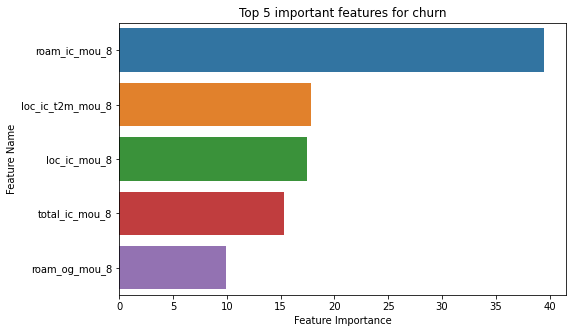

In [202]:
rf_top_5 = imp_df.sort_values(by="Imp", ascending=False).head()

sns.barplot(x= rf_top_5['Imp']/rf_top_5['Imp'].sum()*100, y= rf_top_5['Varname'])
plt.gcf().set_size_inches(8,5)
plt.title("Top 5 important features for churn")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

## Finally, recommend strategies to manage customer churn based on your observations.

#### Based on the model top faetures
- Increase in roaming calls (both incoming and outgoing) in action period is an indication for churn
- Increase in local incoming calls compared to outgoing calls in action period is an indication for churn

`so, the strategy is to identify those customers with increased roaming or incoming calls in action period as potential churn customers`